In [1]:
#import hangul_font
import warnings
import urllib.request as req
import urllib.parse as par
from konlpy.tag import Okt
from collections import Counter
import wordcloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
warnings.filterwarnings(action='ignore')

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
import nltk
# ÌïúÍ∏ÄÌè∞Ìä∏ ÏÇ¨Ïö©
plt.rcParams['font.family'] = 'Malgun Gothic' 
mpl.rc('axes', unicode_minus=False)

In [3]:
data1=pd.read_excel("data/se/del_naver_blog_2019.xlsx")
data2=pd.read_excel("data/se/naver_cafe_ssal_contents_2019_Ï†ÑÏ≤òÎ¶¨ÏôÑ.xlsx")

In [4]:
data1.info()
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8471 entries, 0 to 8470
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    8469 non-null   object
 1   date     8470 non-null   object
 2   chat     3998 non-null   object
 3   content  8179 non-null   object
 4   id       8272 non-null   object
dtypes: object(5)
memory usage: 331.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9554 entries, 0 to 9553
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     9554 non-null   object
 1   nickname  9554 non-null   object
 2   date      9554 non-null   object
 3   content   9549 non-null   object
 4   comments  9036 non-null   object
dtypes: object(5)
memory usage: 373.3+ KB


In [5]:
d3=pd.concat([data1,data2])
d3=d3[["date","content"]]
d3

date                                            content
0     2019.01.29.  :: Pocohol Recipe ::\nÏö∞Î¶¨ ÏïÑÏù¥Î•º ÏúÑÌïú Ï≤´ ÏöîÎ¶¨, ÏåÄÎØ∏Ïùå ÎßåÎì§Í∏∞\...
1     2019.01.20.  #ÏåÄÏºÄÏù¥ÌÅ¨ÎßåÎì§Í∏∞\n\n\n\nÏåÄÏºÄÏù¥ÌÅ¨ÎßåÎì§Í∏∞Ïùò Í∏∞Î≥∏ÏùÄ\n#Ï†úÎàÑÏôÄÏ¶àÎßåÎì§Í∏∞ !!\n\n#...
2     2019.01.09.  ÏùºÎ≥∏Ïãù ÏÜåÍ≥†Í∏∞Ïπ¥Î†à ÎßåÎìúÎäîÎ≤ï ‚ì¶. Ï†ÑÎÇ®ÏåÄ 10kg\nÏñ¥Î¶¥ÎïåÎäî ÏßÄÍ∏àÎèÑ ÎïåÎïåÎ°ú „Öã \nÎÖ∏...
3     2019.01.22.  Í±¥Í∞ïÏöîÎ¶¨ Í∞ïÏ¢åÏóêÏÑú  ÏåÄÎàÑÎ£©ÏúºÎ°ú Îã§ÏñëÌïú ÏöîÎ¶¨Î•º ÎßåÎì§ Ïàò ÏûàÎäî  Í≤ÉÏùÑ ÏïåÍ≥†\nÌò∏Í∏∞Ïã¨Í≥º ...
4     2019.01.27.  Í≥§ÏïΩÎ∞•\nÎßåÎìúÎäî Î≤ï\n#Í≥§ÏïΩÎ∞•\nÍ∏Ä, ÏÇ¨ÏßÑ / Ïπ¥Î†åC\nÏöîÏ¶ò ÏßëÏóêÏÑú ÏãùÏÇ¨Ìï† Îïå Î®πÍ≥†...
...           ...                                                ...
9549   2019.12.17                     ÏåÄÍ≥ºÏûê ÎÉ†ÎÉ† ÎßõÏûàÍ≤å Î®πÏúºÎ©∞ Ïó¥Ïã¨Ìûà Ï¶êÍ≤ÅÍ≤å Í≥µÎ∂ÄÌï¥Î¥êÏöî~üíï
9550   2019.12.13           Ï†ÄÏö∏ÏùÄ Ï§ÄÎπÑÎ•º ÏïàÌñàÏñ¥ÏöîÎ∂ÑÏú†Ïä§ÌëºÏúºÎ°ú ÏåÄÍ∞ÄÎ£® Î™áÍ∑∏Îû® ÎÇòÏò¨ÍπåÏöî?Ï¥àÍ∏∞Ïù¥Ïú†ÏãùÏûÖÎãàÎã§
9551   2019.12.24  ¬† *Ïò§ÎäòÏùò ÏµúÏ†ÄÍ∞Ä Ï†ïÎ≥¥Î°ØÎç∞ Î∞±ÌôîÏ†ê ÎÇ©Ìíà 10kg ÏåÄÎì±Í∏â ÏÉÅÎëêÍ∞ú Íµ¨Îß§ Í∞úÎãπ 23.7...
9552   2019.12.15  ÏåÄÌäÄÎ∞• ÎëêÍ∞ú (Ïú†ÌÜµÍ∏∞Ìïú 2020.3.17)Ïñ¥Í∑∏ 130ÏÇ¨Ïù¥Ï¶à(ÏÇ¨Ïö©Í∞ê ÏûáÎÑ§Ïö©)Í≤ÄÏ†ï Ïö¥Îèô...
9553   2019.12.01  ÎßòÎßàÎ∞Ä ÏïàÏã¨Ïù¥Ïú†Ïãù Îã®Ìò∏Î∞ïÍ≥º ÏÜåÍ≥†Í∏∞ 5Í∞úÏÇ¨Í≥ºÏôÄ Í≥†Íµ¨Îßà Ìì®Î†à 4Í∞ú (20ÎÖÑ 5ÏõîÍπåÏßÄ)Ïöî...

[18025 rows x 2 columns]

In [8]:
data=d3.dropna(axis=0, how='any', subset = ["content"]) 
data=data.reset_index()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17728 entries, 0 to 17727
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    17728 non-null  int64 
 1   date     17727 non-null  object
 2   content  17728 non-null  object
dtypes: int64(1), object(2)
memory usage: 415.6+ KB


In [10]:
17728/4

4432.0

In [12]:
datas1=data['content'][:4432]
datas2=data['content'][4432:8864]
datas3=data['content'][8864:13296]
datas4=data['content'][13296:]

In [13]:
datas1 = datas1.reset_index()
datas1

index                                            content
0         0  :: Pocohol Recipe ::\nÏö∞Î¶¨ ÏïÑÏù¥Î•º ÏúÑÌïú Ï≤´ ÏöîÎ¶¨, ÏåÄÎØ∏Ïùå ÎßåÎì§Í∏∞\...
1         1  #ÏåÄÏºÄÏù¥ÌÅ¨ÎßåÎì§Í∏∞\n\n\n\nÏåÄÏºÄÏù¥ÌÅ¨ÎßåÎì§Í∏∞Ïùò Í∏∞Î≥∏ÏùÄ\n#Ï†úÎàÑÏôÄÏ¶àÎßåÎì§Í∏∞ !!\n\n#...
2         2  ÏùºÎ≥∏Ïãù ÏÜåÍ≥†Í∏∞Ïπ¥Î†à ÎßåÎìúÎäîÎ≤ï ‚ì¶. Ï†ÑÎÇ®ÏåÄ 10kg\nÏñ¥Î¶¥ÎïåÎäî ÏßÄÍ∏àÎèÑ ÎïåÎïåÎ°ú „Öã \nÎÖ∏...
3         3  Í±¥Í∞ïÏöîÎ¶¨ Í∞ïÏ¢åÏóêÏÑú  ÏåÄÎàÑÎ£©ÏúºÎ°ú Îã§ÏñëÌïú ÏöîÎ¶¨Î•º ÎßåÎì§ Ïàò ÏûàÎäî  Í≤ÉÏùÑ ÏïåÍ≥†\nÌò∏Í∏∞Ïã¨Í≥º ...
4         4  Í≥§ÏïΩÎ∞•\nÎßåÎìúÎäî Î≤ï\n#Í≥§ÏïΩÎ∞•\nÍ∏Ä, ÏÇ¨ÏßÑ / Ïπ¥Î†åC\nÏöîÏ¶ò ÏßëÏóêÏÑú ÏãùÏÇ¨Ìï† Îïå Î®πÍ≥†...
...     ...                                                ...
4427   4427  Ï¥àÍ∏∞Ïù¥Ïú†Ïãù ÏÑ∏Î≤àÏß∏Î©îÎâ¥ Í∞êÏûêÎØ∏Ïùå ÎßåÎì§Í∏∞ (Î∂àÎ¶∞ÏåÄ, ÎÉÑÎπÑ Ïù¥Ïö©)\nÏ¥àÍ∏∞Ïù¥Ïú†Ïãù Í∞êÏûêÎØ∏Ïùå ...
4428   4428  Ï§ëÌïôÏÉù ÏπúÍµ¨Îì§Ïùò ÏåÄÍ≥ÑÎûÄÎπµ\nÎßõÏûàÎäî ÎÉÑÏÉà ÏÜîÏÜî Ïñ¥Î¶¥ÎïåÎ®πÎçò Í≥ÑÎûÄÎπµÍ≥ºÎäî \nÏ∞®ÏõêÏù¥ Îã§Î•∏„Öé...
4429   4429  - Ïù¥ÌôîÏò®ÎàÑÎ¶¨ÏïΩÍµ≠, 6„Éª25Ï∞∏Ï†ÑÏú†Í≥µÏûê 10Î™Ö ÏßÄÏõê -\n ‚ñ° Í≤ΩÎÇ®ÎèôÎ∂ÄÎ≥¥ÌõàÏßÄÏ≤≠(ÏßÄÏ≤≠Ïû•...
4430   4430  ÎπÑÎßàÏù¥ÏºÄÏù¥ÌÅ¨ ÏåÄÏ†ÑÎ≥ë 8Ï¢Ö ÌäπÍ∞ï\n\nÏΩîÏΩîÎÑõ, Í∞êÌÉú, ÌîºÏä§ÌÉÄÏπòÏò§, ÌòÑÎØ∏, Í≤ÄÏùÄÍπ®, ÎïÖ...
4431   4431  ÎπÑÎßàÏù¥ÏºÄÏù¥ÌÅ¨ ÏåÄÏ†ÑÎ≥ë 8Ï¢Ö ÌäπÍ∞ï\n\n8Í∞ÄÏßÄ Îßõ.\n\n80Í∞ú Î∂ÑÎüâ / 2Î∞ïÏä§ Ìè¨Ïû• ...

[4432 rows x 2 columns]

In [14]:
datas2 = datas2.reset_index()
datas2

index                                            content
0      4432  16Í∞úÏõî ÏïÑÍ∏∞Í∞ÑÏãù Ï∂îÏ≤ú\nÏïÑÏù¥Î∞∞ÎÉá Ïú†Í∏∞ÎÜç ÏåÄÍ≥ºÏûê\nÏå©ÎßàÎ©ß Ìì®Î†à \nby ÏòàÍ∑∏Î¶¨ÎÇò\n...
1      4433  Î°úÎãàÍ∞Ä 6Í∞§Î∂ÄÌÑ∞ ÏßÄÍ∏àÍπåÏßÄ Ïï†Ï†ïÌïòÎ©∞\nÏûòÎ®πÍ≥†ÏûàÎäî ‚ÄúÏïÑÏù¥Î∞∞ÎÉá Îñ°Îª• Ïú†Í∏∞ÎÜç ÏåÄÍ≥ºÏûê‚Äù\nÍ∏∞...
2      4434  ÌïúÎã¨Ïóê ÌïúÎ≤à Ï≤¥Ìóò Ïò§Îäî Ïö∞Î¶¨ ÏπúÍµ¨Îì§\nÏù¥Î≤àÏóêÎäî ÎçîÏö¥ÎÇ†Ïî®Ïóê Îçî ÎßõÎÇòÍ≤å Î®πÏùÑÏàò ÏûàÎäî Ïó¨...
3      4435  ÏïàÎÖïÌïòÏÑ∏Ïöî~  Ïò§ÎØ∏Í∞ÄÎØ∏ ÌïòÎãàÏå§Ïù¥ÏóêÏöî:)\nÏåÄÎ≤†Ïù¥ÌÇπ\nÏπ¥ÌéòÎîîÏ†ÄÌä∏ ÏåÄÏ†ÑÎ≥ëÏùÑ \nÏàòÏóÖÏò§ÏÖ®...
4      4436  ÏïàÎÖïÌïòÏÑ∏Ïöî.\nÏú†ÏûêÎß§Î∏îÎ°úÍ∑∏ ÏûÖÎãàÎã§ : )\nÏñºÎßàÏ†ÑÏóê Ïù∏ÌÑ∞ÎÑ∑ÏóêÏÑú ÎπµÏùÑ Ï£ºÎ¨∏ÌñàÎäîÎç∞\nÌÉù...
...     ...                                                ...
4427   8859                          ÎåÄÌòïÎßàÌä∏Ïóê ÏåÄ Î∞∞Îã¨Ìï¥ Îã¨Îùº ÌïòÎ©¥ Î∞∞Îã¨Ìï¥ Ï£ºÎÇòÏöî
4428   8860            Îñ° ÎßåÎì§Î†§Í≥† Ìï¥Ïöî^^ÌòπÏãú Î¨µÏùÄÏåÄ ÏûàÏúºÏãúÎ©¥ Íµ¨Ìï¥Î¥ÖÎãàÎã§!Ïó¨Í∏∞Îäî ÌÉÑÌòÑÏù¥ÏóêÏöî~
4429   8861  ÎìúÎîîÏñ¥ ÎÇ¥Ïùº Ï∂úÎ∞úÏûÖÎãàÎã§...Ìú¥¬† Ïù¥Ï†ú Ïã§Í∞êÏù¥ ÎÇòÎÑ§Ïöî^^Ïù¥Í≤ÉÏ†ÄÍ≤É Ï§ÄÎπÑÌïòÎã§ ÏåÄÏùÑ ÏÇ¨Í∞ÄÏïº...
4430   8862  ÏïàÎÖïÌïòÏÑ∏Ïöî.Î¨µÏùÄ ÏåÄ 5-6ÌÇ§Î°ú Ï†ïÎèÑ ÎÇòÎàîÌï©ÎãàÎã§.ÌòπÏãú ÌïÑÏöîÌïòÏã†Î∂Ñ Í≥ÑÏã¨ ÎåìÍ∏Ä Ï£ºÏÑ∏Ïöî.ÏÇº...
4431   8863  ÏÇ¨ÎûåÏù¥ Î®πÏùÑÍ≤åÏïÑÎãàÎùº Í≤®Ïö∏ÎÇòÎäî ÏïºÏÉùÎèôÎ¨ºÎì§ Ï§Ñ ÏåÄÏù¥ÎÇò Ïû°Í≥° Íµ¨Ìï©ÎãàÎã§.Í∑∏ÎÉ•Ï£ºÏãúÎ©¥ ÎçîÏö± Í∞ê...

[4432 rows x 2 columns]

In [15]:
datas3 = datas3.reset_index()
datas3

index                                            content
0      8864  ÏûëÎÖÑ Îßê ÌõÑÍ≥° Ïò¨Í∞ÄÏóêÏÑú ÎëêÎ∞ïÏä§ ÏÉÄÎäîÎç∞ ÌïòÎÇòÎßå Ïì∞Í≥† ÏåÄÎ°ú ÎÑòÏñ¥ÏôîÎÑ§Ïöî. ÌïúÎ∞ïÏä§ ÏÉàÍ±∞Îûë ...
1      8865    Ï∞πÏåÄÍ∞ÄÎ£® Î≥ÑÎ°ú ÏïàÏç®ÏÑú Ï¢Ä Îì§ÏóàÏñ¥Ïöî ÏåÄÍ∞ÄÎ£®Îäî Î≥ÑÎ£® ÏïàÎì§ÏóàÏñ¥Ïöî ÎÇ¥Ïùº Ïò§ÌõÑÏóê Í∞ÄÏ†∏Í∞ÄÏã§Î∂ÑÏö©„Öã
2      8866  ÏïàÎÖïÌïòÏÑ∏Ïöî~~ÏàòÏ†úÎ°ú ÎßåÎìúÎäîÏåÄÎîîÏ†ÄÌä∏~ ÏåÄÏãùÎπµ Ï†ÑÎ¨∏Ï†ê #ÎùºÎ≤†Îòê ÏûÖÎãàÎã§Î∞ÄÍ∞ÄÎ£®Î•º ÏÇ¨Ïö©ÌïòÏßÄ ...
3      8867  Ï¥àÍ∏∞ ÏåÄÎØ∏Ïùå Î¨ΩÍ∏∞Í∞Ä ÎÑàÎ¨¥ Î¨ºÍ∞ôÏúºÎ©¥ ÏïàÎêòÏ£†?Í±∞Ïùò Ïà≠ÎäâÎßõÏù¥ÎçòÎç∞„Ö†„Ö†„Ö†„Öã„Öã„ÖãÎ∂ÑÏú†ÎÜçÎèÑÎûë ÎπÑÏä∑...
4      8868  Î∞©ÏïóÍ∞ÑÏóêÏÑú ÎπªÏïÑÏò® ÏåÄÍ∞ÄÎ£®(ÏÜåÍ∏àÎßåÏ§ÄÍ≤É)ÎÉâÎèôÏã§Ïóê ÏÜåÎ∂ÑÌï¥ÏÑú ÎíÄÎã§Í∞Ä Ïó∞ÏäµÍ≤∏ Îã¥ÎÇ† Ï∞åÎ†§Í≥† ÎÉâ...
...     ...                                                ...
4427  13291  ÏïÑÍ∏∞Í∞Ä ÏïÑÌîåÎïå ÏåÄÎØ∏Ïùå Ìï¥Ï£ºÎùºÌï¥ÏÑú ÏÉÄÏóàÎäîÎç∞ 3Î∂ÑÏùò1ÎèÑ Î™ªÏçºÎÑ§Ïöî„Ö†„Ö†Î∂ÄÏñ¥ÏÑú Ïì∞Í∏¥ÌñàÎäîÎç∞.....
4428  13292  ÎèÑÏ†ï 2019ÎÖÑ 4Ïõî Î∂ÄÌÑ∞6Ïõî ÍπåÏßÄ ÏûÖÎãàÎã§¬† Ï≤®Îã® 2ÏßÄÍµ¨ Ïù¥Í≥† ÏßÅÏ†ë Í∞ÄÏßÄÎü¨ Ïò§ÏÖîÏïº ...
4429  13293  ÏóêÍ≥†..Ï†ïÎßê Ïò§ÎäòÏùÄ ÏåÄÍ∞ÄÎ£® ÏÜåÎ∂ÑÌï†Î†§Í≥†ÌïòÎäîÎç∞ ÏãúÏûëÎ∂ÄÌÑ∞ Ïù¥ÏÉÅÌïú ÏãúÏª¥Îë•Ïù¥Îì§Ïù¥ ÎßéÏù¥ Íª¥ÏûàÏñ¥...
4430  13294  ÏßÄÎÇúÎã¨Ïóê Ïù¥Ï≤ú ÏïÑÏö∏Î†õÍ∞îÎã§Í∞Ä Ìò∏ÎëêÍ≥ºÏûêÏÇ¨Í≥† Í≥ÑÏÇ∞ÌïòÎäîÎç∞ ÏÇ¨Ïû•ÎãòÏù¥Ïã†ÏßÄ Í≥ÑÏÇ∞Ìï¥Ï£ºÏãúÎ©¥ÏÑú ÏåÄÏ£ºÎäî...
4431  13295  ÌÅ¨Í≤åÎ∂ÑÌï†ÌñàÎçîÎãà ÎåÄÏôïÎ™®ÎãùÎπµÎêòÏóàÏñ¥Ïöî„Öé„ÖéÏÜêÎ∞ïÏ£ΩÌûòÎì§Í∏¥Ìï¥ÎèÑ ÏûºÏûàÎäîÍ±∞ Í∞ôÏïÑÏöîÏåÄÍ∞ÄÎ£®Ïóê Îã®Ìò∏Î∞ïÍ∞ÄÎ£®...

[4432 rows x 2 columns]

In [16]:
datas4 = datas4.reset_index()
datas4

index                                            content
0     13296  ÎëòÏß∏ Ï¥àÍ∏∞Ïù¥Ïú†Ïãù ÏãúÏûëÌïòÎ†§ÎäîÎç∞Ïöî~Î≠îÍ∞Ä ÎßàÏùåÏùòÏ§ÄÎπÑÍ∞Ä Ï†úÍ∞Ä„ÖúÏïÑÏßÅ ÏïàÎêúÎìØ;;;;Ï¥àÎ°ùÎßàÏùÑÏóêÏÑú...
1     13297  Íµ¨ÏûÖÌï¥ÎÜìÍ≥† ÏåÄÏùÑ ÍπÄÏπòÎÉâÏû•Í≥†Ïóê Î≥¥Í¥ÄÌïòÎã§Î≥¥ÎãàÌïÑÏöîÌïòÏßÄ ÏïäÏïÑ Íπ®ÎÅóÌûà ÏÑ∏Ï≤ôÌõÑ ÏßÄÏó≠Ïπ¥ÌéòÏóê Ï†ÄÎ†¥...
2     13298               ÏåÄ ÏãùÎπµ Ï≤òÏùå ÎßåÎì§Ïñ¥ Î¥§ÎäîÎç∞ 1Ï∞®Î∞úÌö® ÏïàÌïòÎãà Ìõ®Ïâ¨Ïö¥ ÎäêÎÇåÏù¥ÎÑ§Ïöî„Öé„Öé
3     13299  ÏåÄÍ∞ÄÎ£®ÏôÄ Ìô©ÏπòÏ¶àÍ∞ÄÎ£®Ï°∞Í∏àÎÑ£Ïñ¥ Î∞òÏ£ΩÌïòÍ≥† ÎÑàÎ¨¥ ÎêòÏßÅÌï¥ÏÑú ÏÉùÌÅ¨Î¶ºÎÇ®ÏùÄÍ±∞ Ï°∞Í∏à ÎÑ£Í≥† Ìò∏ÎëêÎÑ£Íµ¨Ïöî...
4     13300  Ï¥àÍ∏∞ Ïù¥Ïú†Ïãù ÏåÄÍ∞ÄÎ£®Ïù∏Îç∞ Ïä§Ìã±Ìè¨Ïû• 5Í∞ú ÎÇ®ÏïÑÏûàÏñ¥Ïöî. Ïù¥Ïú†Ïãù Ï§ëÍ∏∞Î°ú ÎÑòÏñ¥Í∞ÄÎ©¥ÏÑú 5Ìè¨Í∞Ä ...
...     ...                                                ...
4427  17723                     ÏåÄÍ≥ºÏûê ÎÉ†ÎÉ† ÎßõÏûàÍ≤å Î®πÏúºÎ©∞ Ïó¥Ïã¨Ìûà Ï¶êÍ≤ÅÍ≤å Í≥µÎ∂ÄÌï¥Î¥êÏöî~üíï
4428  17724           Ï†ÄÏö∏ÏùÄ Ï§ÄÎπÑÎ•º ÏïàÌñàÏñ¥ÏöîÎ∂ÑÏú†Ïä§ÌëºÏúºÎ°ú ÏåÄÍ∞ÄÎ£® Î™áÍ∑∏Îû® ÎÇòÏò¨ÍπåÏöî?Ï¥àÍ∏∞Ïù¥Ïú†ÏãùÏûÖÎãàÎã§
4429  17725  ¬† *Ïò§ÎäòÏùò ÏµúÏ†ÄÍ∞Ä Ï†ïÎ≥¥Î°ØÎç∞ Î∞±ÌôîÏ†ê ÎÇ©Ìíà 10kg ÏåÄÎì±Í∏â ÏÉÅÎëêÍ∞ú Íµ¨Îß§ Í∞úÎãπ 23.7...
4430  17726  ÏåÄÌäÄÎ∞• ÎëêÍ∞ú (Ïú†ÌÜµÍ∏∞Ìïú 2020.3.17)Ïñ¥Í∑∏ 130ÏÇ¨Ïù¥Ï¶à(ÏÇ¨Ïö©Í∞ê ÏûáÎÑ§Ïö©)Í≤ÄÏ†ï Ïö¥Îèô...
4431  17727  ÎßòÎßàÎ∞Ä ÏïàÏã¨Ïù¥Ïú†Ïãù Îã®Ìò∏Î∞ïÍ≥º ÏÜåÍ≥†Í∏∞ 5Í∞úÏÇ¨Í≥ºÏôÄ Í≥†Íµ¨Îßà Ìì®Î†à 4Í∞ú (20ÎÖÑ 5ÏõîÍπåÏßÄ)Ïöî...

[4432 rows x 2 columns]

In [20]:
result_double_list=[]
for i in data.index:
    content=str(data.loc[i,"content"])
    if len(content)>10:
        
        result=[i,content]
        result_double_list.append(result)
    else:
        print(content)
    

Ïù¥Î¶ÑÏù¥ ÌäπÌûàÌïúÏåÄ „Öã
ÏåÄ ÌååÏã§Î∂Ñ Í≥ÑÏã†Í∞ÄÏöî
Ïò§ÏÖîÏïºÌï©ÎãàÎã§
Í∂åÏÑ†Íµ¨ÏûÖÎãàÎã§
ÎÜçÏÇ¨ÏßÄÏùÄÏåÄ ÏÇΩÎãàÎã§.
Î¨∏ÏûêÏ£ºÏÑ∏Ïöî~
¬†20ÌÇ§Î°úÏßúÎ¶¨ÏóêÏöî¬†
ÌåêÎß§Ìï¥Ïöî~
ÏåÄ
ÏåÄ Ïç©Ïñ¥Ïöî „Ö†„Ö†
ÏåÄÏù¥Ï†ñÏóàÎÑ§Ïöî„Öú„Öú
Ï†ïÏûêÎèôÏûÖÎãàÎã§~
ÏåÄ Ìï≠ÏïÑÎ¶¨ ÎìúÎ¶ΩÎãàÎã§
Ïã†ÎèÑÏãú Ïö¥ÏÑúÎèôÏûÖÎãàÎã§
¬†¬†¬†
ÏåÄ ÏÇΩÎãàÎã§
ÏåÄÎßõÏûàÎäîÍ≥≥Ïöî?
Ìô©ÌÜ†ÏåÄÎã®ÏßÄ25000
ÏåÄÏÑ∏ÏùºÌïòÎäîÍ≥≥Í∏âÌï®
ÏåÄÏ†ÑÏóÖÎÜç ÏûÖÎãàÎã§.
ÏåÄ ÎãàÎì§Ïù¥ÎÇòÏ≤òÎ®πÏñ¥ 
Î≥¥Î¶¨~Î≥¥Î¶¨~ÏåÄ~~
ÏåÄÍ¥úÏ∞ÆÏùÄÍ±¥Í∞ÄÏöî?„Öú„Öú
ÏåÄÏù¥ Îñ®Ïñ¥Ï°åÎÑ§Ïöî „Öú
ÎßõÎÇúÏåÄÍ≥ºÏûê
Ï†ïÏÉÅÏù∏ÏåÄ
¬†¬†¬†¬†
ÏåÄ ÏÇ¨ÏôîÎÑ§Ïöî
ÏåÄ Í∞ÄÏßÄÍ≥† Í∞ÄÏöî
Î™®ÌòÑ,Î∂ÄÏÜ°ÎåìÏ±óÎßåÏõê
ÏåÄ ÌúòÎÇ≠ÏãúÏóêÏûÖ„Ñ¥Îãπ 
ÏåÄ 4ÎßåÏõê 20ÌÇ§Î°ú
ÏåÄÏûàÎÇòÏöî?
Ïò§ÎäòÎ∞õÏùÄÏåÄÏù¥ÏóêÏöî~
ÏåÄÍ∞ÄÎ£®Íµ¨Ìï¥Î¥ÖÎãàÎã§.
Í∂åÏÑ†Îèô ÏûÖÎãàÎã§^^
ÏåÄÏãúÎ™¨ÏªµÏºÄÏù¥ÌÅ¨ÏóêÏö©
Ìå®Î∞∞Ïûê ÏåÄ...
ÎÇ¥Í∞ÄÏ¢ãÏïÑÌïòÎäîÏåÄ„Öã„Öã


In [21]:
data=data.reset_index()

In [22]:
result_df=pd.DataFrame(result_double_list,columns=["index","text"])
print(result_df.shape)
result_df

(17689, 2)


index                                               text
0          0  :: Pocohol Recipe ::\nÏö∞Î¶¨ ÏïÑÏù¥Î•º ÏúÑÌïú Ï≤´ ÏöîÎ¶¨, ÏåÄÎØ∏Ïùå ÎßåÎì§Í∏∞\...
1          1  #ÏåÄÏºÄÏù¥ÌÅ¨ÎßåÎì§Í∏∞\n\n\n\nÏåÄÏºÄÏù¥ÌÅ¨ÎßåÎì§Í∏∞Ïùò Í∏∞Î≥∏ÏùÄ\n#Ï†úÎàÑÏôÄÏ¶àÎßåÎì§Í∏∞ !!\n\n#...
2          2  ÏùºÎ≥∏Ïãù ÏÜåÍ≥†Í∏∞Ïπ¥Î†à ÎßåÎìúÎäîÎ≤ï ‚ì¶. Ï†ÑÎÇ®ÏåÄ 10kg\nÏñ¥Î¶¥ÎïåÎäî ÏßÄÍ∏àÎèÑ ÎïåÎïåÎ°ú „Öã \nÎÖ∏...
3          3  Í±¥Í∞ïÏöîÎ¶¨ Í∞ïÏ¢åÏóêÏÑú  ÏåÄÎàÑÎ£©ÏúºÎ°ú Îã§ÏñëÌïú ÏöîÎ¶¨Î•º ÎßåÎì§ Ïàò ÏûàÎäî  Í≤ÉÏùÑ ÏïåÍ≥†\nÌò∏Í∏∞Ïã¨Í≥º ...
4          4  Í≥§ÏïΩÎ∞•\nÎßåÎìúÎäî Î≤ï\n#Í≥§ÏïΩÎ∞•\nÍ∏Ä, ÏÇ¨ÏßÑ / Ïπ¥Î†åC\nÏöîÏ¶ò ÏßëÏóêÏÑú ÏãùÏÇ¨Ìï† Îïå Î®πÍ≥†...
...      ...                                                ...
17684  17723                     ÏåÄÍ≥ºÏûê ÎÉ†ÎÉ† ÎßõÏûàÍ≤å Î®πÏúºÎ©∞ Ïó¥Ïã¨Ìûà Ï¶êÍ≤ÅÍ≤å Í≥µÎ∂ÄÌï¥Î¥êÏöî~üíï
17685  17724           Ï†ÄÏö∏ÏùÄ Ï§ÄÎπÑÎ•º ÏïàÌñàÏñ¥ÏöîÎ∂ÑÏú†Ïä§ÌëºÏúºÎ°ú ÏåÄÍ∞ÄÎ£® Î™áÍ∑∏Îû® ÎÇòÏò¨ÍπåÏöî?Ï¥àÍ∏∞Ïù¥Ïú†ÏãùÏûÖÎãàÎã§
17686  17725  ¬† *Ïò§ÎäòÏùò ÏµúÏ†ÄÍ∞Ä Ï†ïÎ≥¥Î°ØÎç∞ Î∞±ÌôîÏ†ê ÎÇ©Ìíà 10kg ÏåÄÎì±Í∏â ÏÉÅÎëêÍ∞ú Íµ¨Îß§ Í∞úÎãπ 23.7...
17687  17726  ÏåÄÌäÄÎ∞• ÎëêÍ∞ú (Ïú†ÌÜµÍ∏∞Ìïú 2020.3.17)Ïñ¥Í∑∏ 130ÏÇ¨Ïù¥Ï¶à(ÏÇ¨Ïö©Í∞ê ÏûáÎÑ§Ïö©)Í≤ÄÏ†ï Ïö¥Îèô...
17688  17727  ÎßòÎßàÎ∞Ä ÏïàÏã¨Ïù¥Ïú†Ïãù Îã®Ìò∏Î∞ïÍ≥º ÏÜåÍ≥†Í∏∞ 5Í∞úÏÇ¨Í≥ºÏôÄ Í≥†Íµ¨Îßà Ìì®Î†à 4Í∞ú (20ÎÖÑ 5ÏõîÍπåÏßÄ)Ïöî...

[17689 rows x 2 columns]

In [23]:
result_df.drop_duplicates(inplace=True)
result_df.shape

(17689, 2)

In [24]:
from konlpy.tag import Okt
okt = Okt()

In [25]:
import re
def cleanText(readData):
    text=re.sub("[^(Í∞Ä-Ìû£a-zA-Z0-9. )]", '',readData)
    return text

In [26]:
from tqdm import tqdm
mas_double_list=[]
for text in tqdm(result_df['text']):
    mas_loc=okt.nouns(cleanText(text))
    mas_double_list.append(mas_loc)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 17689/17689 [08:42<00:00, 33.87it/s]


In [27]:
result_df["mas"]=mas_double_list
result_df.head()

index                                               text  \
0      0  :: Pocohol Recipe ::\nÏö∞Î¶¨ ÏïÑÏù¥Î•º ÏúÑÌïú Ï≤´ ÏöîÎ¶¨, ÏåÄÎØ∏Ïùå ÎßåÎì§Í∏∞\...   
1      1  #ÏåÄÏºÄÏù¥ÌÅ¨ÎßåÎì§Í∏∞\n\n\n\nÏåÄÏºÄÏù¥ÌÅ¨ÎßåÎì§Í∏∞Ïùò Í∏∞Î≥∏ÏùÄ\n#Ï†úÎàÑÏôÄÏ¶àÎßåÎì§Í∏∞ !!\n\n#...   
2      2  ÏùºÎ≥∏Ïãù ÏÜåÍ≥†Í∏∞Ïπ¥Î†à ÎßåÎìúÎäîÎ≤ï ‚ì¶. Ï†ÑÎÇ®ÏåÄ 10kg\nÏñ¥Î¶¥ÎïåÎäî ÏßÄÍ∏àÎèÑ ÎïåÎïåÎ°ú „Öã \nÎÖ∏...   
3      3  Í±¥Í∞ïÏöîÎ¶¨ Í∞ïÏ¢åÏóêÏÑú  ÏåÄÎàÑÎ£©ÏúºÎ°ú Îã§ÏñëÌïú ÏöîÎ¶¨Î•º ÎßåÎì§ Ïàò ÏûàÎäî  Í≤ÉÏùÑ ÏïåÍ≥†\nÌò∏Í∏∞Ïã¨Í≥º ...   
4      4  Í≥§ÏïΩÎ∞•\nÎßåÎìúÎäî Î≤ï\n#Í≥§ÏïΩÎ∞•\nÍ∏Ä, ÏÇ¨ÏßÑ / Ïπ¥Î†åC\nÏöîÏ¶ò ÏßëÏóêÏÑú ÏãùÏÇ¨Ìï† Îïå Î®πÍ≥†...   

                                                 mas  
0  [Ïö∞Î¶¨, ÏïÑÏù¥, ÏúÑ, Ï≤´, ÏöîÎ¶¨, ÏåÄ, ÎØ∏Ïùå, ÎßåÎì§Í∏∞, ÌïòÎ£®, ÌïòÎ£®, Í∏∞Ï†Å, Ïö∞Î¶¨,...  
1  [ÏåÄ, ÏºÄÏù¥ÌÅ¨, ÎßåÎì§Í∏∞, ÏåÄ, ÏºÄÏù¥ÌÅ¨, ÎßåÎì§Í∏∞, Í∏∞Î≥∏, ÎàÑ, ÎßåÎì§Í∏∞, ÎàÑ, Ï†Ä, Í≤Ω...  
2  [ÏùºÎ≥∏, ÏÜåÍ≥†Í∏∞, Ïπ¥Î†à, Î≤ï, Ï†ÑÎÇ®, ÏåÄ, Îïå, ÏßÄÍ∏à, ÎöúÍ∏∞, Ïπ¥Î†à, Ìñ•Ïã†Î£å, ÎÉÑÏÉà...  
3  [Í±¥Í∞ï, ÏöîÎ¶¨, Í∞ïÏ¢å, ÏåÄ, ÎàÑÎ£©, ÏöîÎ¶¨, Ïàò, Í≤É, Ïïå, Ìò∏Í∏∞Ïã¨, Î≥¥Í≥†, ÎßàÏùå, ...  
4  [Í≥§ÏïΩ, Î∞•, Î≤ï, Í≥§ÏïΩ, Î∞•Í∏Ä, ÏÇ¨ÏßÑ, Ïπ¥Î†å, ÏöîÏ¶ò, Ïßë, ÏãùÏÇ¨, Îïå, Í≥§ÏïΩ, Î∞•...

In [28]:
st = ['Ï≤úÏõê', 'Íº≠Í±∏', 'Î®πÏù¥', 'Í∑∏ÎÇ†', 'ÏÇ≠Ï†ú', 'ÌÇ§', 'Ï†ïÎßê', 'ÏûÖ', 'Îßå', 'Ìè¨Ïä§ÌåÖ', 'ÏïΩÍ∞Ñ', 'Ï†ïÎ≥¥', 
'Îßê', 'Ïñ¥Ï†ú', 'ÏòµÏÖò', 'ÏïÑÎûò', 'Î∂Ñ', 'Ï≤òÏùå', 'Í∞ú', 'ÎÖÑ', 'ÌòπÏãú', 'ÏÇ¨Îûå', 'Ïãú', 'Ï∂îÏ≤ú', 'ÏåÄ', 'Ïï†', 'Ï†ÄÌù¨', 'Î°ú', 'Ïù¥Ïö©',
 'ÌåêÎß§', 'Ï≤¥', 'Í∞ÄÏöî', 'ÏÇ¨', 'Î≤àÌò∏', 'Ïù¥Ï†ú', 'ÎÇò', 'ÏùÑ', 'Í≤ΩÏö∞', 'Ïò§Îäò', 'ÏïÑÏ£º', 'ÏßÑÏßú', 'Î™®Îëê', 'ÏûêÎèô', 'ÎÇ†', 'ÏãúÍ≥®', 'Îäî', 'ÏÜê', 
 'ÏÉùÍ∞Å', 'ÏßàÎ¨∏', 'Ïó∞ÎùΩ', 'ÏÇ¥', 'Ïó≠Ïãú', 'ÏÑºÏπò', 'Íµ¨ÏûÖ', 'ÎÅº', 'Ïö©', 'ÏÇ¨Ïã§', 'Í≤É', 'Î∞∞', 'ÏúÑ', 'ÏöîÏ¶ò', 'Îã§Î•∏', 'ÏßÄÍ∏à', 'Î∂à', 'ÏãúÏûë', 
 'Îã§Ïãú', 'Ïö∞Î¶¨', 'ÏùÄ', 'ÏÇ¨Îûë', 'Í±∞', 'ÌÇπ', 'Ï†úÌíà', 'Îì±', 'Ï°∞Í∏à', 'ÎÇ¥', 'Ïù¥ÌõÑ', 'Ïïû', 'Ï§Ñ', 'Îã®Í≥Ñ', 'Ïù¥Î≤à', 'ÏßÅÏ†ë', 'Ïù¥', 'Ïû¨ÏÉù',
  'Ï¢Ä', 'ÎØ∏Îãà', 'Î¥â', 'Í∞Ä', 'Îßò', 'Ïõî', 'ÎìØ', 'Ï§ë', 'Ï†Ä', 'Ïã†Î∂Ñ', 'Ï≤´', 'ÎØ∏Î¶¨', 'Îçî', 'ÏÇ¨Ïö©', 'Ïó¨Í∏∞', 'ÎÜçÏÇ¨', 'Ïöî', 'ÌïúÎ≤à', 'ÏûëÏÑ±', 
  'Í≤åÏãú', 'Ï£ºÎ¨∏', 'Ïñ¥Îîî', 'ÎÜç', 'ÏÇ∞', 'Í∞úÏõî', 'Í±∞Ïùò', 'Ïïà', 'Î•º', 'ÏôÑÏ†Ñ', 'Ï†ú', 'Î∞è', 'Ïã§', 'Í∏Ä', 'Ïõê', 'Îã§Ïùå', 'ÏúÑÌï¥', 'Í≥≥', 'Í∑∏ÎÉ•',
   'Íµ¨Îß§', 'Ï¥àÍ∏∞', 'Ï§ÄÎπÑ', 'ÎèÑ', 'Í≥ÑÏÜç', 'Îïå', 'Ïú†ÌÜµ', 'ÏÇ¥Ïßù', 'Î®πÍ∏∞', 'ÌõÑ', 'ÎÇòÎàî', 'ÎïåÎ™®Îëê', 'ÎåìÍ∏Ä', 'Ïïå', 'Í∑úÏ†ï', 'Ï†ïÎèÑ', 'Ï†ê', 
   'Ïä§Ìëº', 'ÏñºÎßà', 'ÌôîÏßà', 'Ïùº', 'Î™ª', 'ÎßàÏùÑ', 'ÎßåÏõê', 'ÏïÑÏãú', 'ÌïòÎ£®', 'Í±∏', 'Ï†Ñ', 'Î∞îÎ°ú', 'Ïàò', 'Îòê', 'Ï§ëÍ∏∞', 'Î≤à', 'Î®ºÏ†Ä', 'Îã¨', 
   'Í∏∞', 'Í±¥', 'Î∞ò', 'Íµ¨', 'ÏàüÍ∞ÄÎùΩ', 'ÏÇ¨ÏßÑ', 'ÏÑ†ÌÉù', 'ÏÇ¨ÏÑú', 'Ìò∏', 'ÏôÑÏÑ±', 'Í∞ÄÏßÄ', 'Î≠ê', 'Í∞ÄÏû•', 'ÎÇ¥Ïùº', 'Í≥µÏßÄ', 'ÎïåÎ¨∏', 'Î∞©Î≤ï', 
   'Î≥¥Í≥†', 'Ïù¥ÏÉÅ', 'ÎÅù', 'ÌïòÎÇò', 'Ìï¥', 'ÏÇ¨Ìï≠', 'ÌïúÍµ≠', 'Í∑∏', 'Ïäµ', 'Íº≠', 'Ïôú', 'Îñ°Îª•',
   "Î≥¥Ïãú","Ìï®","Ï¥ù","Î™á","Î≠ò","Îì±Îì±","Ïû•","ÏòÜ","Îã¥","Í∏∏","Î≥¥","Ï£º","Ï¥à","Î≥º","Í≤å","Ìï¥ÎèÑ",'Î≥¥ÌÜµ',"Îç∞","Ïãù",'Ï¥à',"Îòë","Ìè¨","Î°úÎßå","Ìï¥Î®π","Ïò®","ÌïòÎãà","Îäò","ÌãÄ","ÏÜç","Î™Ö","Îí§",
"Îã®", "Ïó¨", "ÏßÄÏùÄ","Î∞î","Îßâ",'Ï™Ω',"Î≠ò","Ï¥ù","ÏïΩ","ÎÇº"]

In [29]:
q = " "
for i in range(len(datas1)):
    try:
        q += data['content'][i]+" "
    except:
        pass
    
nouns = okt.nouns(q)
nouns2=nouns
nouns2_copy=nouns.copy()

In [30]:
q = " "
for i in range(len(datas2)):
    try:
        q += data['content'][i]+" "
    except:
        pass
    
nouns_2 = okt.nouns(q)
nouns2_2=nouns_2
nouns2_copy_2=nouns_2.copy()

In [31]:
q = " "
for i in range(len(datas3)):
    try:
        q += data['content'][i]+" "
    except:
        pass
    
nouns_3 = okt.nouns(q)
nouns2_3=nouns_3
nouns2_copy_3=nouns_3.copy()

In [32]:
q = " "
for i in range(len(datas4)):
    try:
        q += data['content'][i]+" "
    except:
        pass
    
nouns_4 = okt.nouns(q)
nouns2_4=nouns_4
nouns2_copy_4=nouns_4.copy()

In [33]:
noun_sum = nouns2 + nouns2_2 + nouns2_3 + nouns2_4

In [34]:
noun_sum_1=noun_sum
noun_sum_2=noun_sum
nouns_sum_copy=noun_sum.copy()

In [35]:
r=[]

for i in noun_sum_2 :
    if i =="ÏïÑÍ∞Ä":
        t=i.replace("ÏïÑÍ∞Ä","ÏïÑÏù¥")
        r.append(t)
    else:
       r.append(i) 
noun_sum_2=r



r=[]

for i in noun_sum_2 :
    if i =="ÏïÑÍ∏∞":
        t=i.replace("ÏïÑÍ∏∞","ÏïÑÏù¥")
        r.append(t)
    else:
       r.append(i) 
noun_sum_2=r


r=[]

for i in noun_sum_2 :
    if i =="Ïï†Í∏∞":
        t=i.replace("Ïï†Í∏∞","ÏïÑÏù¥")
        r.append(t)
    else:
       r.append(i) 
noun_sum_2=r


r=[]

for i in noun_sum_2 :
    if i =="Î≤†Ïù¥":
        t=i.replace("Î≤†Ïù¥","Î≤†Ïù¥ÌÇπ")
        r.append(t)
    else:
       r.append(i) 
noun_sum_2=r

r=[]
for i in noun_sum_2 :
    if i =="ÏåÄÎ≤åÎ†à":
        t=i.replace("ÏåÄÎ≤åÎ†à","Î≤åÎ†à")
        r.append(t)
    else:
       r.append(i) 
noun_sum_2=r

r=[]
for i in noun_sum_2 :
    if i =="Î≤åÎûò":
        t=i.replace("Î≤åÎûò","Î≤åÎ†à")
        r.append(t)
    else:
       r.append(i) 
noun_sum_2=r

r=[]
for i in noun_sum_2 :
    if i =="ÏåÄÎ≤åÎûò":
        t=i.replace("ÏåÄÎ≤åÎûò","Î≤åÎ†à")
        r.append(t)
    else:
       r.append(i) 
noun_sum_2=r

r=[]
for i in noun_sum_2 :
    if i =="Î∞îÍµ¨ÎØ∏":
        t=i.replace("Î∞îÍµ¨ÎØ∏","Î≤åÎ†à")
        r.append(t)
    else:
       r.append(i) 
noun_sum_2=r


r=[]
for i in noun_sum_2 :
    if i =="Í∏∞Ìïú":
        t=i.replace("Í∏∞Ìïú","Ïú†ÌÜµÍ∏∞Ìïú")
        r.append(t)
    else:
       r.append(i) 
noun_sum_2=r


r=[]
for i in noun_sum_2 :
    if i =="Î∞∞ÏÜ°":
        t=i.replace("Î∞∞ÏÜ°","Î∞∞Îã¨")
        r.append(t)
    else:
       r.append(i) 
noun_sum_2=r


r=[]
for i in noun_sum_2 :
    if i =="ÌÉùÎ∞∞":
        t=i.replace("ÌÉùÎ∞∞","Î∞∞Îã¨")
        r.append(t)
    else:
       r.append(i) 
noun_sum_2=r



r=[]
for i in noun_sum_2 :
    if i =="Î∞ïÎ†•":
        t=i.replace("Î∞ïÎ†•","Î∞ïÎ†•Î∂Ñ")
        r.append(t)
    else:
       r.append(i) 
noun_sum_2=r



In [36]:
count = Counter(nouns2_copy)

count

# remove_char_counter = Counter({x: count[x] for x in count if len(x) > 1})
remove_char_counter = Counter(
    {x: count[x] for x in count if x not in st})

print(remove_char_counter)

Counter({'Îßõ': 7079, 'Î∞•': 6303, 'Ïù¥Ïú†Ïãù': 6247, 'Í∞ÄÎ£®': 5549, 'Î¨º': 4761, 'Í≥ºÏûê': 4489, 'ÎØ∏Ïùå': 3156, 'ÏïÑÏù¥': 2922, 'Í≥§ÏïΩ': 2876, 'ÏïÑÍ∏∞': 2743, 'Îñ°': 2360, 'Í∞ÑÏãù': 2255, 'Ïßë': 2215, 'Îπµ': 2214, 'Ïû¨Î£å': 2206, 'Ïú†Í∏∞ÎÜç': 2138, 'ÌòÑÎØ∏': 2064, 'ÏãúÍ∞Ñ': 1966, 'ÏºÄÏù¥ÌÅ¨': 1871, 'Ìè¨Ïû•': 1825, 'Î≥¥Í¥Ä': 1782, 'ÏàòÏóÖ': 1708, 'ÎßåÎì§Í∏∞': 1543, 'ÏóÑÎßà': 1516, 'Îã§Ïù¥Ïñ¥Ìä∏': 1462, 'ÏÑ†Î¨º': 1329, 'Î≤†Ïù¥': 1304, 'Îñ°Î≥∂Ïù¥': 1300, 'ÎäêÎÇå': 1289, 'Ï∞πÏåÄ': 1278, 'Í∞ÄÍ≤©': 1257, 'ÌîºÏûê': 1200, 'Î∞ÄÍ∞ÄÎ£®': 1182, 'Ìñ•': 1153, 'ÏÜåÍ≥†Í∏∞': 1149, 'ÏπòÏ¶à': 1134, 'Î∞±ÎØ∏': 1118, 'Í±¥Í∞ï': 1059, 'ÏïºÏ±Ñ': 1053, 'ÏãùÍ∞ê': 1020, 'Ïñë': 1009, 'Î∞òÏ£Ω': 996, 'Îñ°Íµ≠': 995, 'ÎßàÏùå': 994, 'ÏùåÏãù': 988, 'Ï¢ÖÎ•ò': 933, 'Î©îÎâ¥': 921, 'Ïø†ÌÇ§': 894, 'ÎÉÑÎπÑ': 852, 'Î™®Ïñë': 851, 'Ïπ¥Ìéò': 839, 'ÏùºÎ∞ò': 836, 'ÌÅ¨Î¶º': 823, 'Í∞ïÏ†ï': 819, 'Í≥†Î°úÏºÄ': 815, 'ÏÑ§ÌÉï': 811, 'Í∞êÏûê': 797, 'Îã®Ìò∏Î∞ï': 795, 'ÎßâÍ±∏Î¶¨': 794, 'Ïö©Í∏∞': 791, 'Íµ≠ÎÇ¥': 780, 'Ìï´ÎèÑÍ∑∏': 778, 'ÏãùÌ

In [37]:
count = Counter(remove_char_counter).most_common()
count

[('Îßõ', 7079),
 ('Î∞•', 6303),
 ('Ïù¥Ïú†Ïãù', 6247),
 ('Í∞ÄÎ£®', 5549),
 ('Î¨º', 4761),
 ('Í≥ºÏûê', 4489),
 ('ÎØ∏Ïùå', 3156),
 ('ÏïÑÏù¥', 2922),
 ('Í≥§ÏïΩ', 2876),
 ('ÏïÑÍ∏∞', 2743),
 ('Îñ°', 2360),
 ('Í∞ÑÏãù', 2255),
 ('Ïßë', 2215),
 ('Îπµ', 2214),
 ('Ïû¨Î£å', 2206),
 ('Ïú†Í∏∞ÎÜç', 2138),
 ('ÌòÑÎØ∏', 2064),
 ('ÏãúÍ∞Ñ', 1966),
 ('ÏºÄÏù¥ÌÅ¨', 1871),
 ('Ìè¨Ïû•', 1825),
 ('Î≥¥Í¥Ä', 1782),
 ('ÏàòÏóÖ', 1708),
 ('ÎßåÎì§Í∏∞', 1543),
 ('ÏóÑÎßà', 1516),
 ('Îã§Ïù¥Ïñ¥Ìä∏', 1462),
 ('ÏÑ†Î¨º', 1329),
 ('Î≤†Ïù¥', 1304),
 ('Îñ°Î≥∂Ïù¥', 1300),
 ('ÎäêÎÇå', 1289),
 ('Ï∞πÏåÄ', 1278),
 ('Í∞ÄÍ≤©', 1257),
 ('ÌîºÏûê', 1200),
 ('Î∞ÄÍ∞ÄÎ£®', 1182),
 ('Ìñ•', 1153),
 ('ÏÜåÍ≥†Í∏∞', 1149),
 ('ÏπòÏ¶à', 1134),
 ('Î∞±ÎØ∏', 1118),
 ('Í±¥Í∞ï', 1059),
 ('ÏïºÏ±Ñ', 1053),
 ('ÏãùÍ∞ê', 1020),
 ('Ïñë', 1009),
 ('Î∞òÏ£Ω', 996),
 ('Îñ°Íµ≠', 995),
 ('ÎßàÏùå', 994),
 ('ÏùåÏãù', 988),
 ('Ï¢ÖÎ•ò', 933),
 ('Î©îÎâ¥', 921),
 ('Ïø†ÌÇ§', 894),
 ('ÎÉÑÎπÑ', 852),
 ('Î™®Ïñë', 851),
 ('Ïπ¥Ìéò', 839),
 ('ÏùºÎ∞ò', 836),
 ('ÌÅ¨Î¶º', 823),
 (

In [38]:
mas_counts=Counter(remove_char_counter)
data_barh=pd.DataFrame(mas_counts.most_common(50),
columns=["word","counts"])
data_barh.head()

word  counts
0    Îßõ    7079
1    Î∞•    6303
2  Ïù¥Ïú†Ïãù    6247
3   Í∞ÄÎ£®    5549
4    Î¨º    4761

In [39]:
min_count=100
word_list=[]
for word,count in count:
    if count>min_count:
        word_list.append(word)
        

In [40]:
print(len(word_list))
word_list

1153


['Îßõ',
 'Î∞•',
 'Ïù¥Ïú†Ïãù',
 'Í∞ÄÎ£®',
 'Î¨º',
 'Í≥ºÏûê',
 'ÎØ∏Ïùå',
 'ÏïÑÏù¥',
 'Í≥§ÏïΩ',
 'ÏïÑÍ∏∞',
 'Îñ°',
 'Í∞ÑÏãù',
 'Ïßë',
 'Îπµ',
 'Ïû¨Î£å',
 'Ïú†Í∏∞ÎÜç',
 'ÌòÑÎØ∏',
 'ÏãúÍ∞Ñ',
 'ÏºÄÏù¥ÌÅ¨',
 'Ìè¨Ïû•',
 'Î≥¥Í¥Ä',
 'ÏàòÏóÖ',
 'ÎßåÎì§Í∏∞',
 'ÏóÑÎßà',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'ÏÑ†Î¨º',
 'Î≤†Ïù¥',
 'Îñ°Î≥∂Ïù¥',
 'ÎäêÎÇå',
 'Ï∞πÏåÄ',
 'Í∞ÄÍ≤©',
 'ÌîºÏûê',
 'Î∞ÄÍ∞ÄÎ£®',
 'Ìñ•',
 'ÏÜåÍ≥†Í∏∞',
 'ÏπòÏ¶à',
 'Î∞±ÎØ∏',
 'Í±¥Í∞ï',
 'ÏïºÏ±Ñ',
 'ÏãùÍ∞ê',
 'Ïñë',
 'Î∞òÏ£Ω',
 'Îñ°Íµ≠',
 'ÎßàÏùå',
 'ÏùåÏãù',
 'Ï¢ÖÎ•ò',
 'Î©îÎâ¥',
 'Ïø†ÌÇ§',
 'ÎÉÑÎπÑ',
 'Î™®Ïñë',
 'Ïπ¥Ìéò',
 'ÏùºÎ∞ò',
 'ÌÅ¨Î¶º',
 'Í∞ïÏ†ï',
 'Í≥†Î°úÏºÄ',
 'ÏÑ§ÌÉï',
 'Í∞êÏûê',
 'Îã®Ìò∏Î∞ï',
 'ÎßâÍ±∏Î¶¨',
 'Ïö©Í∏∞',
 'Íµ≠ÎÇ¥',
 'Ìï´ÎèÑÍ∑∏',
 'ÏãùÌíà',
 'ÎèÑÏ†ï',
 'ÏÜåÏä§',
 'ÏïÑÏπ®',
 'ÏπòÌÇ®',
 'ÏãùÎπµ',
 'Î¨¥',
 'Î∞•Îßõ',
 'ÎßõÏßë',
 'ÎîîÏ†ÄÌä∏',
 'Í≥†Íµ¨Îßà',
 'ÌÅ¥ÎûòÏä§',
 'ÌõÑÍ∏∞',
 'Ï¥àÏΩî',
 'Î∞ïÏä§',
 'ÎàÑÎ£ΩÏßÄ',
 'ÎÉâÎèô',
 'Î†àÏãúÌîº',
 'ÏπºÎ°úÎ¶¨',
 'Î∞úÌö®',
 'Î∞îÏÇ≠',
 'ÏåÄÎ∞•',
 'Î¨∏Ïùò',
 'ÏöîÎ¶¨',
 'ÏåÄÍµ≠Ïàò',
 'ÎùºÏù¥Ïä

In [41]:
CHANGE_WORDS_SET=[['ÏïÑÍ∞Ä', 'ÏïÑÏù¥'],
 ['ÏïÑÍ∏∞', 'ÏïÑÏù¥'],
 ['Ïï†Í∏∞', 'ÏïÑÏù¥'],
 ['Î≤†Ïù¥', 'Î≤†Ïù¥ÌÇπ'],
 ['ÏåÄÎ≤åÎ†à', 'Î≤åÎ†à'],
 ['Î≤åÎûò', 'Î≤åÎ†à'],
 ['ÏåÄÎ≤åÎûò', 'Î≤åÎ†à'],
 ['Î∞îÍµ¨ÎØ∏', 'Î≤åÎ†à'],
 ['Í∏∞Ìïú', 'Ïú†ÌÜµÍ∏∞Ìïú'],
 ['Î∞∞ÏÜ°', 'Î∞∞Îã¨'],
 ['ÌÉùÎ∞∞', 'Î∞∞Îã¨'],
 ['Î∞ïÎ†•', 'Î∞ïÎ†•Î∂Ñ']]

In [42]:
result_df

index                                               text  \
0          0  :: Pocohol Recipe ::\nÏö∞Î¶¨ ÏïÑÏù¥Î•º ÏúÑÌïú Ï≤´ ÏöîÎ¶¨, ÏåÄÎØ∏Ïùå ÎßåÎì§Í∏∞\...   
1          1  #ÏåÄÏºÄÏù¥ÌÅ¨ÎßåÎì§Í∏∞\n\n\n\nÏåÄÏºÄÏù¥ÌÅ¨ÎßåÎì§Í∏∞Ïùò Í∏∞Î≥∏ÏùÄ\n#Ï†úÎàÑÏôÄÏ¶àÎßåÎì§Í∏∞ !!\n\n#...   
2          2  ÏùºÎ≥∏Ïãù ÏÜåÍ≥†Í∏∞Ïπ¥Î†à ÎßåÎìúÎäîÎ≤ï ‚ì¶. Ï†ÑÎÇ®ÏåÄ 10kg\nÏñ¥Î¶¥ÎïåÎäî ÏßÄÍ∏àÎèÑ ÎïåÎïåÎ°ú „Öã \nÎÖ∏...   
3          3  Í±¥Í∞ïÏöîÎ¶¨ Í∞ïÏ¢åÏóêÏÑú  ÏåÄÎàÑÎ£©ÏúºÎ°ú Îã§ÏñëÌïú ÏöîÎ¶¨Î•º ÎßåÎì§ Ïàò ÏûàÎäî  Í≤ÉÏùÑ ÏïåÍ≥†\nÌò∏Í∏∞Ïã¨Í≥º ...   
4          4  Í≥§ÏïΩÎ∞•\nÎßåÎìúÎäî Î≤ï\n#Í≥§ÏïΩÎ∞•\nÍ∏Ä, ÏÇ¨ÏßÑ / Ïπ¥Î†åC\nÏöîÏ¶ò ÏßëÏóêÏÑú ÏãùÏÇ¨Ìï† Îïå Î®πÍ≥†...   
...      ...                                                ...   
17684  17723                     ÏåÄÍ≥ºÏûê ÎÉ†ÎÉ† ÎßõÏûàÍ≤å Î®πÏúºÎ©∞ Ïó¥Ïã¨Ìûà Ï¶êÍ≤ÅÍ≤å Í≥µÎ∂ÄÌï¥Î¥êÏöî~üíï   
17685  17724           Ï†ÄÏö∏ÏùÄ Ï§ÄÎπÑÎ•º ÏïàÌñàÏñ¥ÏöîÎ∂ÑÏú†Ïä§ÌëºÏúºÎ°ú ÏåÄÍ∞ÄÎ£® Î™áÍ∑∏Îû® ÎÇòÏò¨ÍπåÏöî?Ï¥àÍ∏∞Ïù¥Ïú†ÏãùÏûÖÎãàÎã§   
17686  17725  ¬† *Ïò§ÎäòÏùò ÏµúÏ†ÄÍ∞Ä Ï†ïÎ≥¥Î°ØÎç∞ Î∞±ÌôîÏ†ê ÎÇ©Ìíà 10kg ÏåÄÎì±Í∏â ÏÉÅÎëêÍ∞ú Íµ¨Îß§ Í∞úÎãπ 23.7...   
17687  17726  ÏåÄÌäÄÎ∞• ÎëêÍ∞ú (Ïú†ÌÜµÍ∏∞Ìïú 2020.3.17)Ïñ¥Í∑∏ 130ÏÇ¨Ïù¥Ï¶à(ÏÇ¨Ïö©Í∞ê ÏûáÎÑ§Ïö©)Í≤ÄÏ†ï Ïö¥Îèô...   
17688  17727  ÎßòÎßàÎ∞Ä ÏïàÏã¨Ïù¥Ïú†Ïãù Îã®Ìò∏Î∞ïÍ≥º ÏÜåÍ≥†Í∏∞ 5Í∞úÏÇ¨Í≥ºÏôÄ Í≥†Íµ¨Îßà Ìì®Î†à 4Í∞ú (20ÎÖÑ 5ÏõîÍπåÏßÄ)Ïöî...   

                                                     mas  
0      [Ïö∞Î¶¨, ÏïÑÏù¥, ÏúÑ, Ï≤´, ÏöîÎ¶¨, ÏåÄ, ÎØ∏Ïùå, ÎßåÎì§Í∏∞, ÌïòÎ£®, ÌïòÎ£®, Í∏∞Ï†Å, Ïö∞Î¶¨,...  
1      [ÏåÄ, ÏºÄÏù¥ÌÅ¨, ÎßåÎì§Í∏∞, ÏåÄ, ÏºÄÏù¥ÌÅ¨, ÎßåÎì§Í∏∞, Í∏∞Î≥∏, ÎàÑ, ÎßåÎì§Í∏∞, ÎàÑ, Ï†Ä, Í≤Ω...  
2      [ÏùºÎ≥∏, ÏÜåÍ≥†Í∏∞, Ïπ¥Î†à, Î≤ï, Ï†ÑÎÇ®, ÏåÄ, Îïå, ÏßÄÍ∏à, ÎöúÍ∏∞, Ïπ¥Î†à, Ìñ•Ïã†Î£å, ÎÉÑÏÉà...  
3      [Í±¥Í∞ï, ÏöîÎ¶¨, Í∞ïÏ¢å, ÏåÄ, ÎàÑÎ£©, ÏöîÎ¶¨, Ïàò, Í≤É, Ïïå, Ìò∏Í∏∞Ïã¨, Î≥¥Í≥†, ÎßàÏùå, ...  
4      [Í≥§ÏïΩ, Î∞•, Î≤ï, Í≥§ÏïΩ, Î∞•Í∏Ä, ÏÇ¨ÏßÑ, Ïπ¥Î†å, ÏöîÏ¶ò, Ïßë, ÏãùÏÇ¨, Îïå, Í≥§ÏïΩ, Î∞•...  
...                                                  ...  
17684                                        [ÏåÄ, Í≥ºÏûê, Í≥µÎ∂Ä]  
17685               [Ï†ÄÏö∏, Ï§ÄÎπÑ, Î∂ÑÏú†, Ïä§Ìëº, ÏåÄ, Í∞ÄÎ£®, Í∑∏Îû®, Ï¥àÍ∏∞, Ïù¥Ïú†Ïãù]  
17686  [Ïò§Îäò, ÏµúÏ†Ä, Ï†ïÎ≥¥, Î°ØÎç∞, Î∞±ÌôîÏ†ê, ÎÇ©Ìíà, ÏåÄ, Îì±Í∏â, ÏÉÅ, Í∞ú, Íµ¨Îß§, Ï†úÌíà,...  
17687  [ÏåÄ, ÌäÄÎ∞•, Í∞ú, Ïú†ÌÜµ, Í∏∞Ìïú, Ïñ¥Í∑∏, ÏÇ¨Ïù¥Ï¶à, Ïö©Í∞ê, Í≤ÄÏ†ï, Ïö¥ÎèôÌôî, ÏÇ¨Ïù¥Ï¶à, ...  
17688  [ÎßòÎßà, Î∞Ä, ÏïàÏã¨, Ïù¥Ïú†Ïãù, Îã®Ìò∏Î∞ï, ÏÜåÍ≥†Í∏∞, Í∞ú, ÏÇ¨Í≥º, Í≥†Íµ¨Îßà, Ìì®Î†à, Í∞ú, ...  

[17689 rows x 3 columns]

In [43]:
mas_double_list=[]
for mas_loc in result_df["mas"]:
    mas_sptd=mas_loc
    mas_list=[]
    for mas in mas_sptd:
        if mas not in st and mas in word_list:
            for cw in CHANGE_WORDS_SET:
                if cw[0]==mas:
                    mas==cw[1]
            mas_list.append(mas)
    mas_double_list.append(mas_list)


In [44]:
len(mas_double_list)

17689

In [45]:
from gensim import corpora
from gensim import models

In [46]:
dictionary=corpora.Dictionary(mas_double_list)

In [47]:
corpus=[]
for mas_loc in mas_double_list:
    term_vect=dictionary.doc2bow(mas_loc)
    corpus.append(term_vect)

In [50]:
from konlpy.tag import Mecab
from tqdm import tqdm
import re
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric
import logging
import pickle
import pyLDAvis.gensim_models
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt


def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


def find_optimal_number_of_topics(dictionary, corpus, processed_data):
    limit = 50;
    start = 2;
    step = 2;

    model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=processed_data, start=start, limit=limit, step=step)

    x = range(start, limit, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.grid(True)
    plt.show()

    for m, cv in zip(x, coherence_values):
        print("Num Topics =", m, " has Coherence value of", round(cv, 4))


C:\Users\CPB06GameN\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
dictionary.filter_extremes(no_below=100)
corpus = [dictionary.doc2bow(text) for text in (mas_double_list)]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

C:\Users\CPB06GameN\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of unique tokens: 1082
Number of documents: 17689


C:\Users\CPB06GameN\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2021-08-26 18:09:41,526 : INFO : using symmetric alpha at 0.5
2021-08-26 18:09:41,527 : INFO : using symmetric eta at 0.5
2021-08-26 18:09:41,528 : INFO : using serial LDA version on this node
2021-08-26 18:09:41,530 : INFO : running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 17689 documents, updating model once every 2000 documents, evaluating perplexity every 17689 documents, iterating 50x with a convergence threshold of 0.001000
2021-08-26 18:09:41,532 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2021

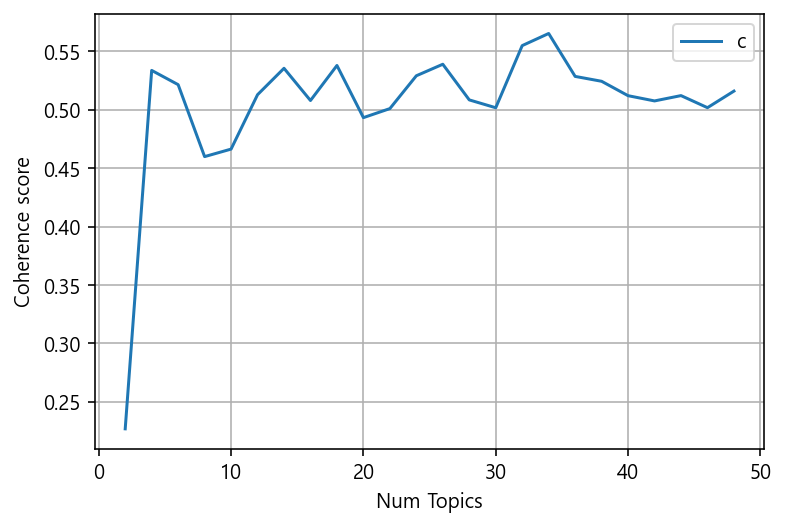

Num Topics = 2  has Coherence value of 0.2268
Num Topics = 4  has Coherence value of 0.5337
Num Topics = 6  has Coherence value of 0.5215
Num Topics = 8  has Coherence value of 0.4599
Num Topics = 10  has Coherence value of 0.4663
Num Topics = 12  has Coherence value of 0.5129
Num Topics = 14  has Coherence value of 0.5355
Num Topics = 16  has Coherence value of 0.5079
Num Topics = 18  has Coherence value of 0.5379
Num Topics = 20  has Coherence value of 0.4932
Num Topics = 22  has Coherence value of 0.501
Num Topics = 24  has Coherence value of 0.5291
Num Topics = 26  has Coherence value of 0.5389
Num Topics = 28  has Coherence value of 0.5084
Num Topics = 30  has Coherence value of 0.5017
Num Topics = 32  has Coherence value of 0.5549
Num Topics = 34  has Coherence value of 0.5653
Num Topics = 36  has Coherence value of 0.5285
Num Topics = 38  has Coherence value of 0.5244
Num Topics = 40  has Coherence value of 0.512
Num Topics = 42  has Coherence value of 0.5075
Num Topics = 44  ha

In [52]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


find_optimal_number_of_topics(dictionary, corpus, mas_double_list)

In [53]:
import pyLDAvis

import pyLDAvis.gensim_models as gensimvis
# k = 12

# #  Î™®Îç∏ ÏÉùÏÑ±
# lda_model = gensim.models.ldamulticore.LdaMulticore(corpus, iterations = 12, num_topics = k, id2word = dictionary , passes = 1, workers = 10)

# # Î∂ÑÏÑù Í≤∞Í≥º ÌôïÏù∏ 
# print(lda_model.print_topics(num_topics = k, num_words = 15))



# prepared_data = gensimvis.prepare(lda_model, corpus, dictionary)
# pyLDAvis.save_html(prepared_data, 'LDA.html')
# pyLDAvis.display(prepared_data)

C:\Users\CPB06GameN\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
perplexity_logger = PerplexityMetric(corpus=corpus, logger='shell') 
coherence_logger = CoherenceMetric(corpus=corpus, coherence="u_mass", logger='shell')


C:\Users\CPB06GameN\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
lda_model = LdaModel(corpus, id2word=dictionary, num_topics=18, passes=10, callbacks=[coherence_logger, perplexity_logger])

topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

    # Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=lda_model, texts=mas_double_list, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score (c_v): ', coherence_lda)

    # Compute Coherence Score using UMass
coherence_model_lda = CoherenceModel(model=lda_model, texts=mas_double_list, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score (u_mass): ', coherence_lda)

2021-08-26 19:53:08,546 : INFO : using symmetric alpha at 0.05555555555555555
2021-08-26 19:53:08,548 : INFO : using symmetric eta at 0.05555555555555555
2021-08-26 19:53:08,549 : INFO : using serial LDA version on this node
2021-08-26 19:53:08,553 : INFO : running online (multi-pass) LDA training, 18 topics, 10 passes over the supplied corpus of 17689 documents, updating model once every 2000 documents, evaluating perplexity every 17689 documents, iterating 50x with a convergence threshold of 0.001000
2021-08-26 19:53:08,554 : INFO : PROGRESS: pass 0, at document #2000/17689
2021-08-26 19:53:09,728 : INFO : merging changes from 2000 documents into a model of 17689 documents
2021-08-26 19:53:09,729 : INFO : topic #17 (0.056): 0.034*"Îßõ" + 0.029*"Í≥§ÏïΩ" + 0.028*"ÌîºÏûê" + 0.013*"Î∞•" + 0.012*"Îπµ" + 0.011*"Î≤†Ïù¥" + 0.010*"ÏºÄÏù¥ÌÅ¨" + 0.008*"ÏïôÍ∏à" + 0.008*"Î©∏Ïπò" + 0.008*"Í≥†Î°úÏºÄ"
2021-08-26 19:53:09,729 : INFO : topic #5 (0.056): 0.064*"Í≥ºÏûê" + 0.031*"Îßõ" + 0.025*"ÏïÑÍ∏∞" + 

(0, '0.147*"Í∞ÄÎ£®" + 0.044*"Î∞òÏ£Ω" + 0.032*"Ìï´ÎèÑÍ∑∏" + 0.023*"Î†àÏãúÌîº" + 0.023*"ÏÑ§ÌÉï"')
(1, '0.182*"Îπµ" + 0.056*"Ïπ¥Ïä§ÌÖåÎùº" + 0.032*"ÎπµÏßë" + 0.028*"ÏåÄÎπµ" + 0.026*"Ïù¥ÏõÉ"')
(2, '0.220*"Îñ°" + 0.108*"Îñ°Î≥∂Ïù¥" + 0.046*"Îñ°Íµ≠" + 0.034*"Î∞©ÏïóÍ∞Ñ" + 0.029*"Îñ°Ïßë"')
(3, '0.157*"ÏºÄÏù¥ÌÅ¨" + 0.035*"ÎîîÏ†ÄÌä∏" + 0.030*"ÏïôÍ∏à" + 0.028*"Îã§Ïø†ÏïÑÏ¶à" + 0.024*"Îî∏Í∏∞"')
(4, '0.127*"Í≥§ÏïΩ" + 0.102*"Î∞•" + 0.076*"Îã§Ïù¥Ïñ¥Ìä∏" + 0.028*"ÏπºÎ°úÎ¶¨" + 0.027*"ÌÉÑÏàòÌôîÎ¨º"')
(5, '0.104*"Îßõ" + 0.040*"ÏïÑÏù¥" + 0.033*"Í∞ÑÏãù" + 0.018*"ÎùºÏù¥Ïä§" + 0.017*"ÏåÄÍµ≠Ïàò"')
(6, '0.180*"ÌòÑÎØ∏" + 0.059*"ÎàÑÎ£ΩÏßÄ" + 0.052*"Î∞±ÎØ∏" + 0.032*"ÏåÄÎàà" + 0.031*"Ïû°Í≥°"')
(7, '0.119*"ÏãùÎπµ" + 0.054*"Ï°∞Ï≤≠" + 0.034*"ÏöîÎ¶¨" + 0.029*"ÎπÑÍ±¥" + 0.026*"Ïû¨Î£å"')
(8, '0.135*"Ïù¥Ïú†Ïãù" + 0.104*"Í∞ÄÎ£®" + 0.072*"ÎØ∏Ïùå" + 0.037*"Î¨º" + 0.021*"ÏÜåÍ≥†Í∏∞"')
(9, '0.117*"Î≥¥Í¥Ä" + 0.039*"Î≤åÎ†à" + 0.033*"ÌÜµ" + 0.024*"ÎÉâÎèô" + 0.024*"ÎÉâÏû•"')
(10, '0.168*"Î∞•" + 0.032*"Îßõ" + 0.030*"Î∞•Îßõ" + 0.029*"

2021-08-26 19:55:03,887 : INFO : 23 batches submitted to accumulate stats from 1472 documents (-31426 virtual)
2021-08-26 19:55:03,909 : INFO : 25 batches submitted to accumulate stats from 1600 documents (-31946 virtual)
2021-08-26 19:55:04,136 : INFO : 32 batches submitted to accumulate stats from 2048 documents (-41817 virtual)
2021-08-26 19:55:04,710 : INFO : 56 batches submitted to accumulate stats from 3584 documents (-76185 virtual)
2021-08-26 19:55:05,772 : INFO : 106 batches submitted to accumulate stats from 6784 documents (-139239 virtual)
2021-08-26 19:55:06,095 : INFO : 117 batches submitted to accumulate stats from 7488 documents (-151627 virtual)
2021-08-26 19:55:07,597 : INFO : 11 accumulators retrieved from output queue
2021-08-26 19:55:07,749 : INFO : accumulated word occurrence stats for 146760 virtual documents



Coherence Score (c_v):  0.5858435899065109


2021-08-26 19:55:08,909 : INFO : CorpusAccumulator accumulated stats from 1000 documents
2021-08-26 19:55:08,931 : INFO : CorpusAccumulator accumulated stats from 2000 documents
2021-08-26 19:55:08,953 : INFO : CorpusAccumulator accumulated stats from 3000 documents
2021-08-26 19:55:08,976 : INFO : CorpusAccumulator accumulated stats from 4000 documents
2021-08-26 19:55:09,000 : INFO : CorpusAccumulator accumulated stats from 5000 documents
2021-08-26 19:55:09,023 : INFO : CorpusAccumulator accumulated stats from 6000 documents
2021-08-26 19:55:09,051 : INFO : CorpusAccumulator accumulated stats from 7000 documents
2021-08-26 19:55:09,077 : INFO : CorpusAccumulator accumulated stats from 8000 documents
2021-08-26 19:55:09,089 : INFO : CorpusAccumulator accumulated stats from 9000 documents
2021-08-26 19:55:09,099 : INFO : CorpusAccumulator accumulated stats from 10000 documents
2021-08-26 19:55:09,106 : INFO : CorpusAccumulator accumulated stats from 11000 documents
2021-08-26 19:55:09


Coherence Score (u_mass):  -2.3297835696519713


In [66]:
prepared_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(prepared_data, 'LDA_2019_18topic.html')
pyLDAvis.display(prepared_data)

In [67]:
from gensim import corpora 
from gensim import models
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
import urllib.request as req
import urllib.parse as par
from konlpy.tag import Okt
from collections import Counter
import wordcloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
warnings.filterwarnings(action='ignore')

<Figure size 2160x2160 with 0 Axes>

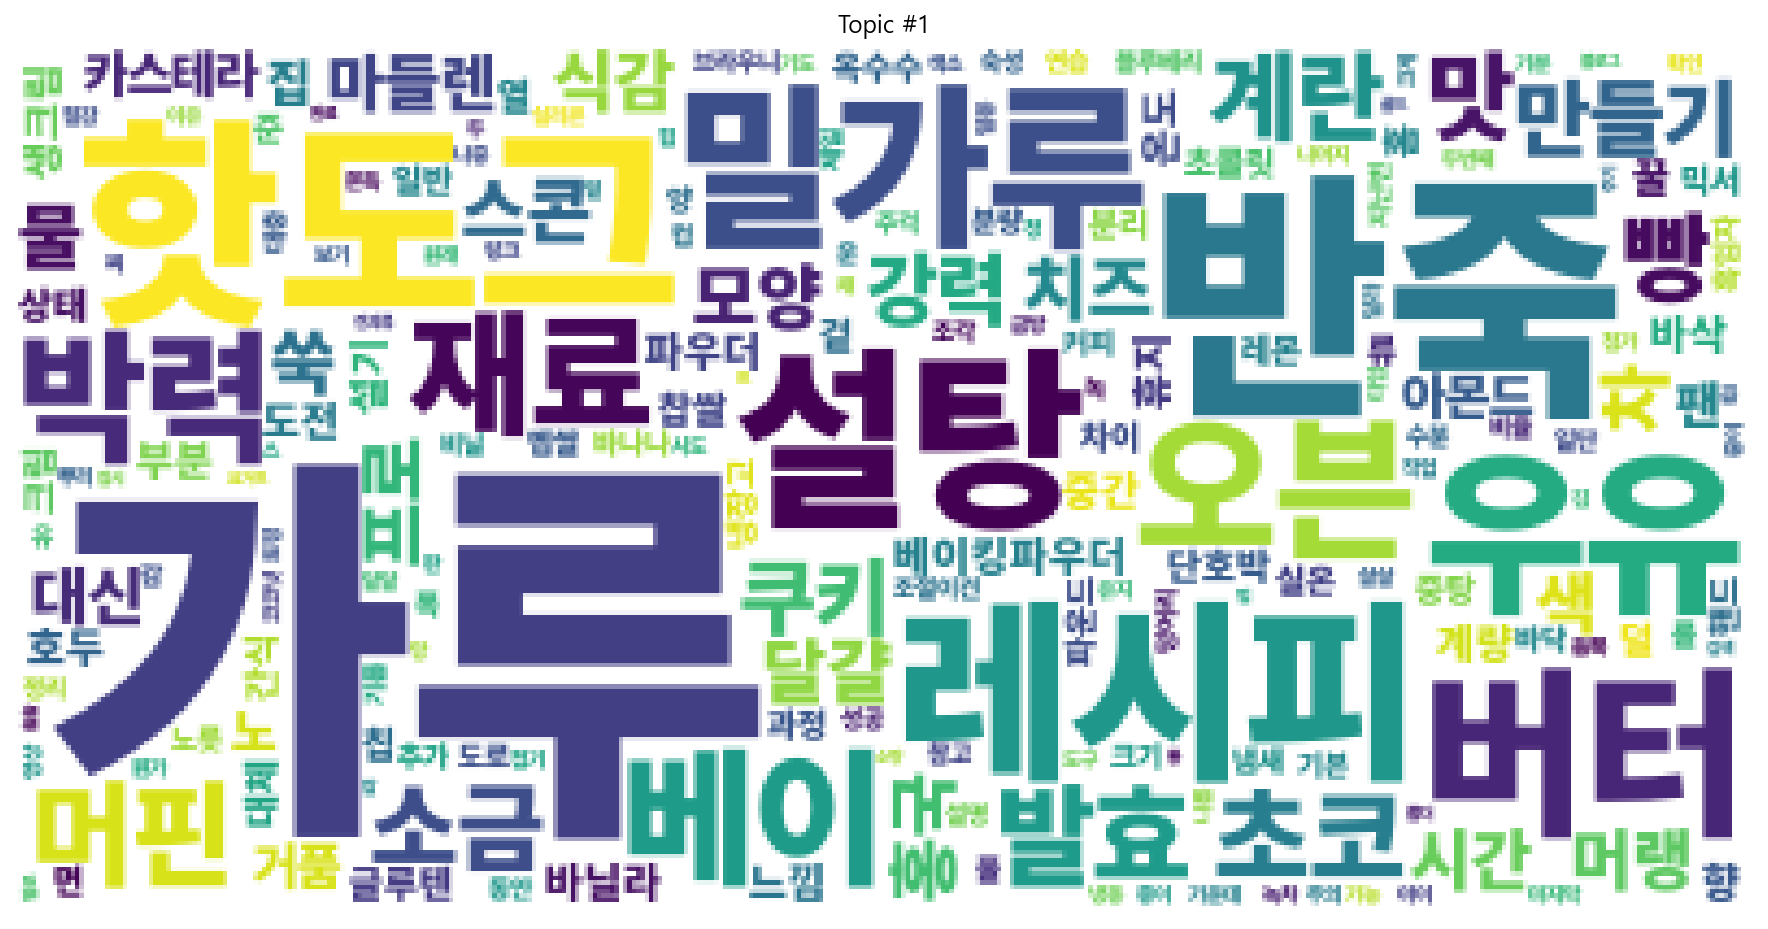

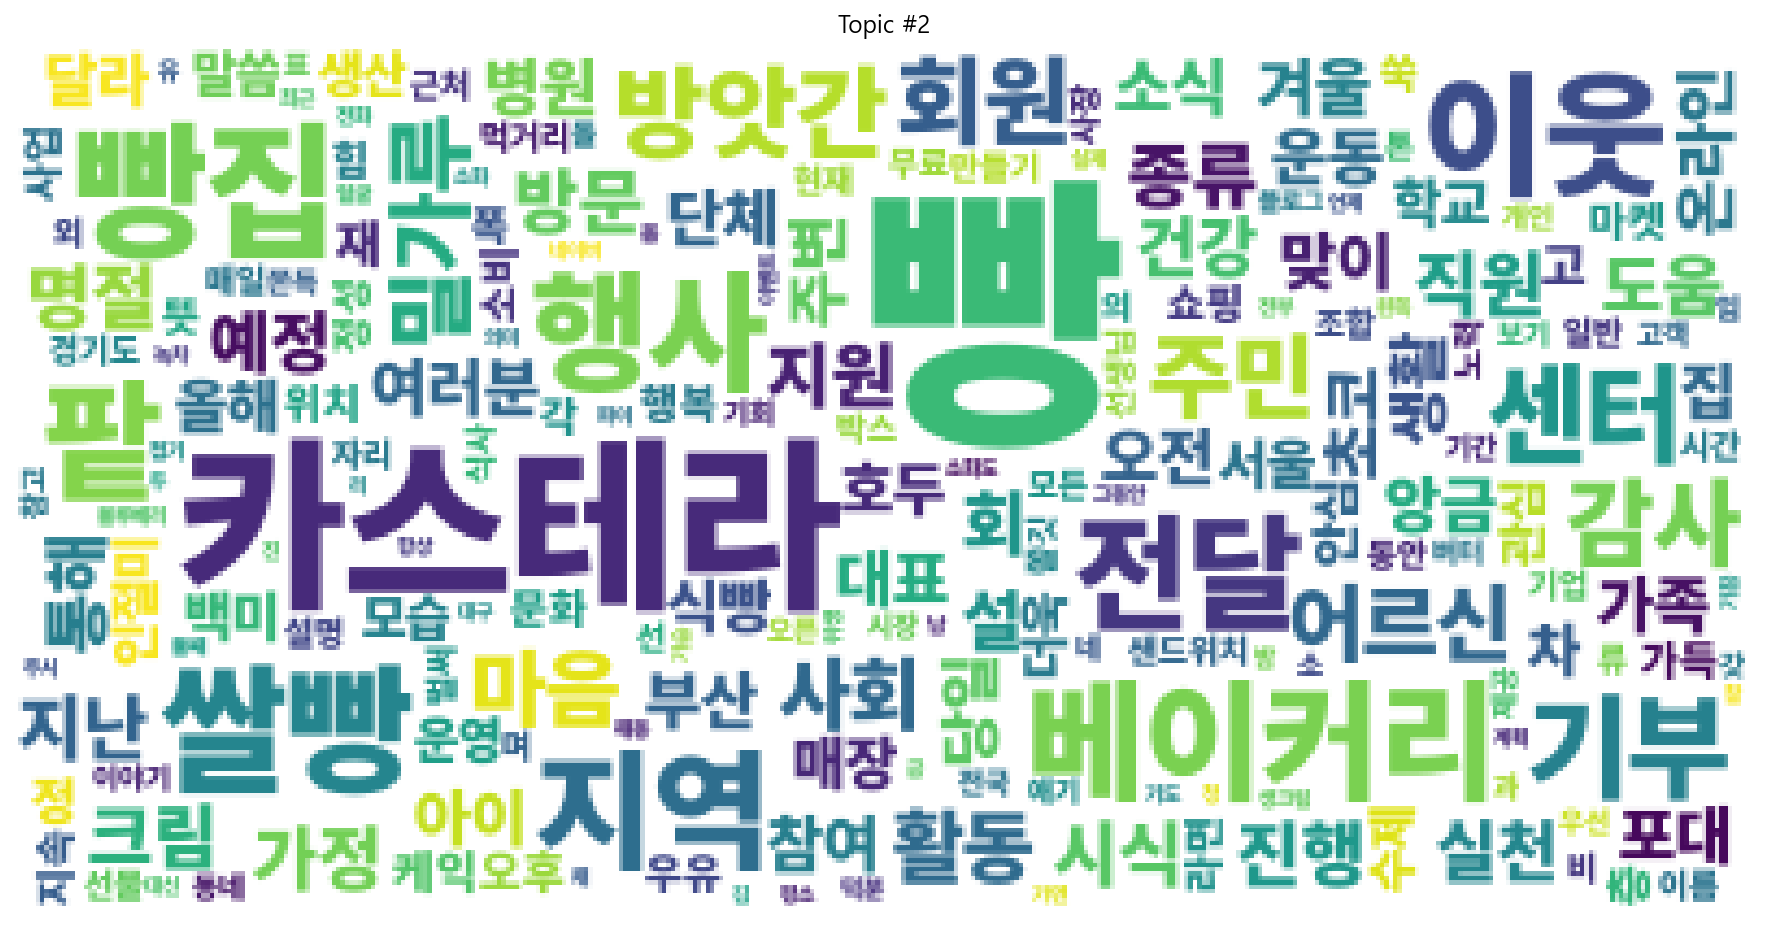

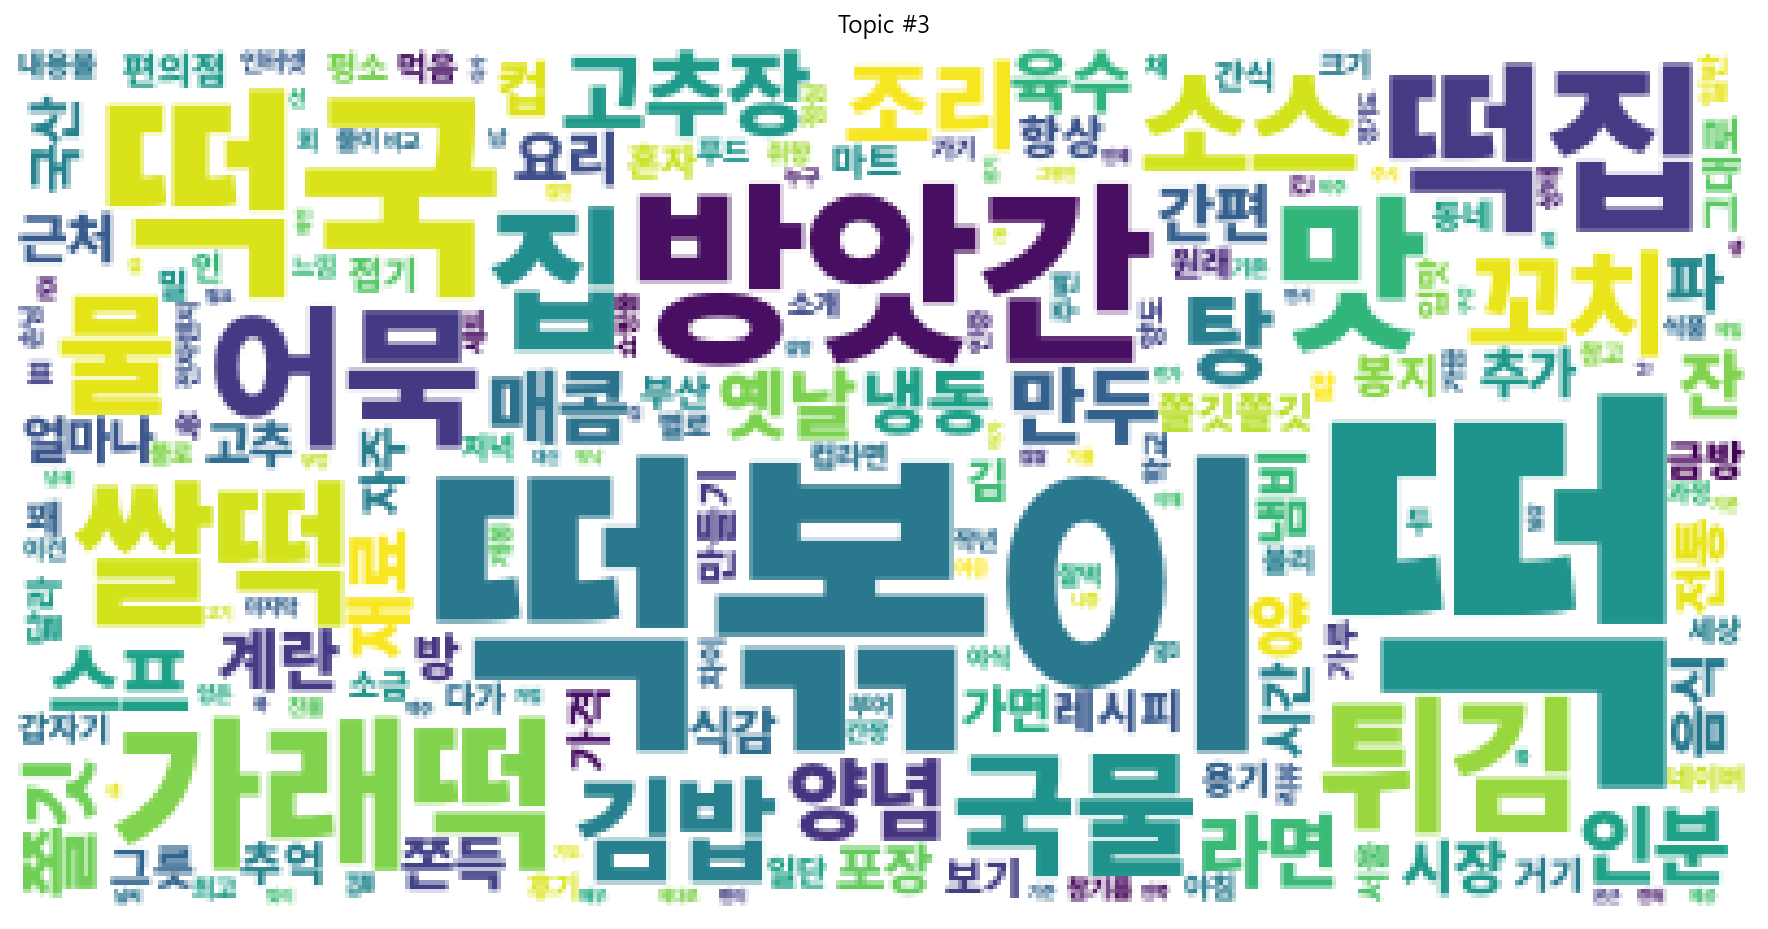

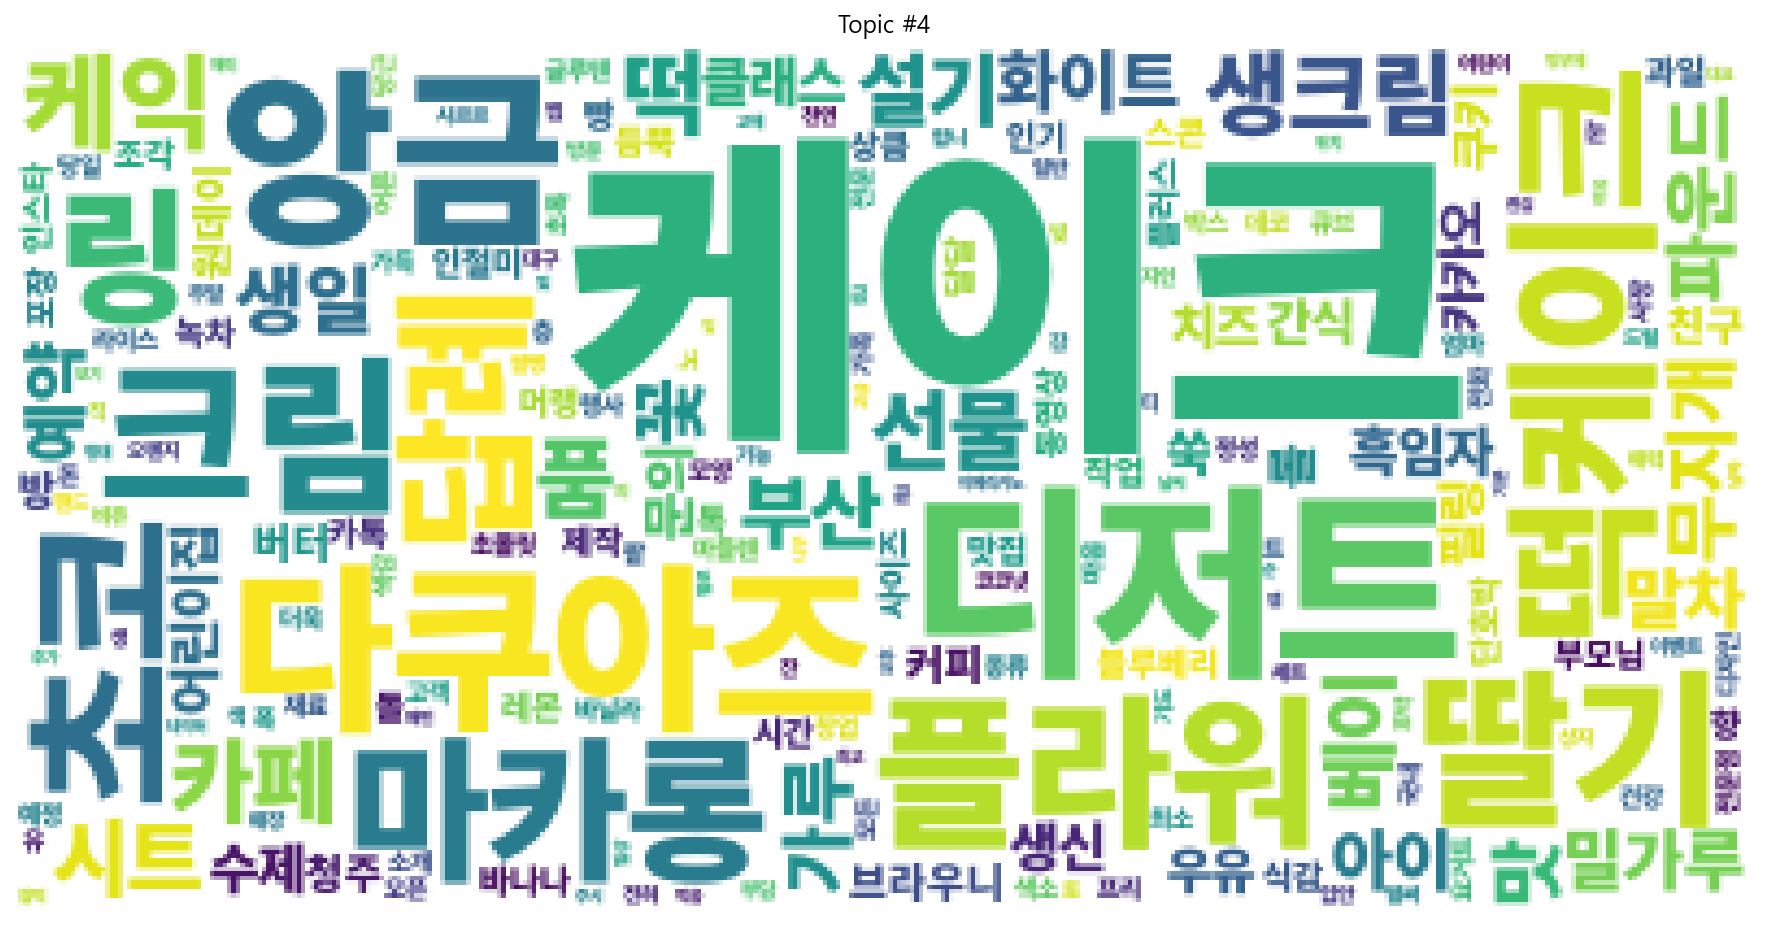

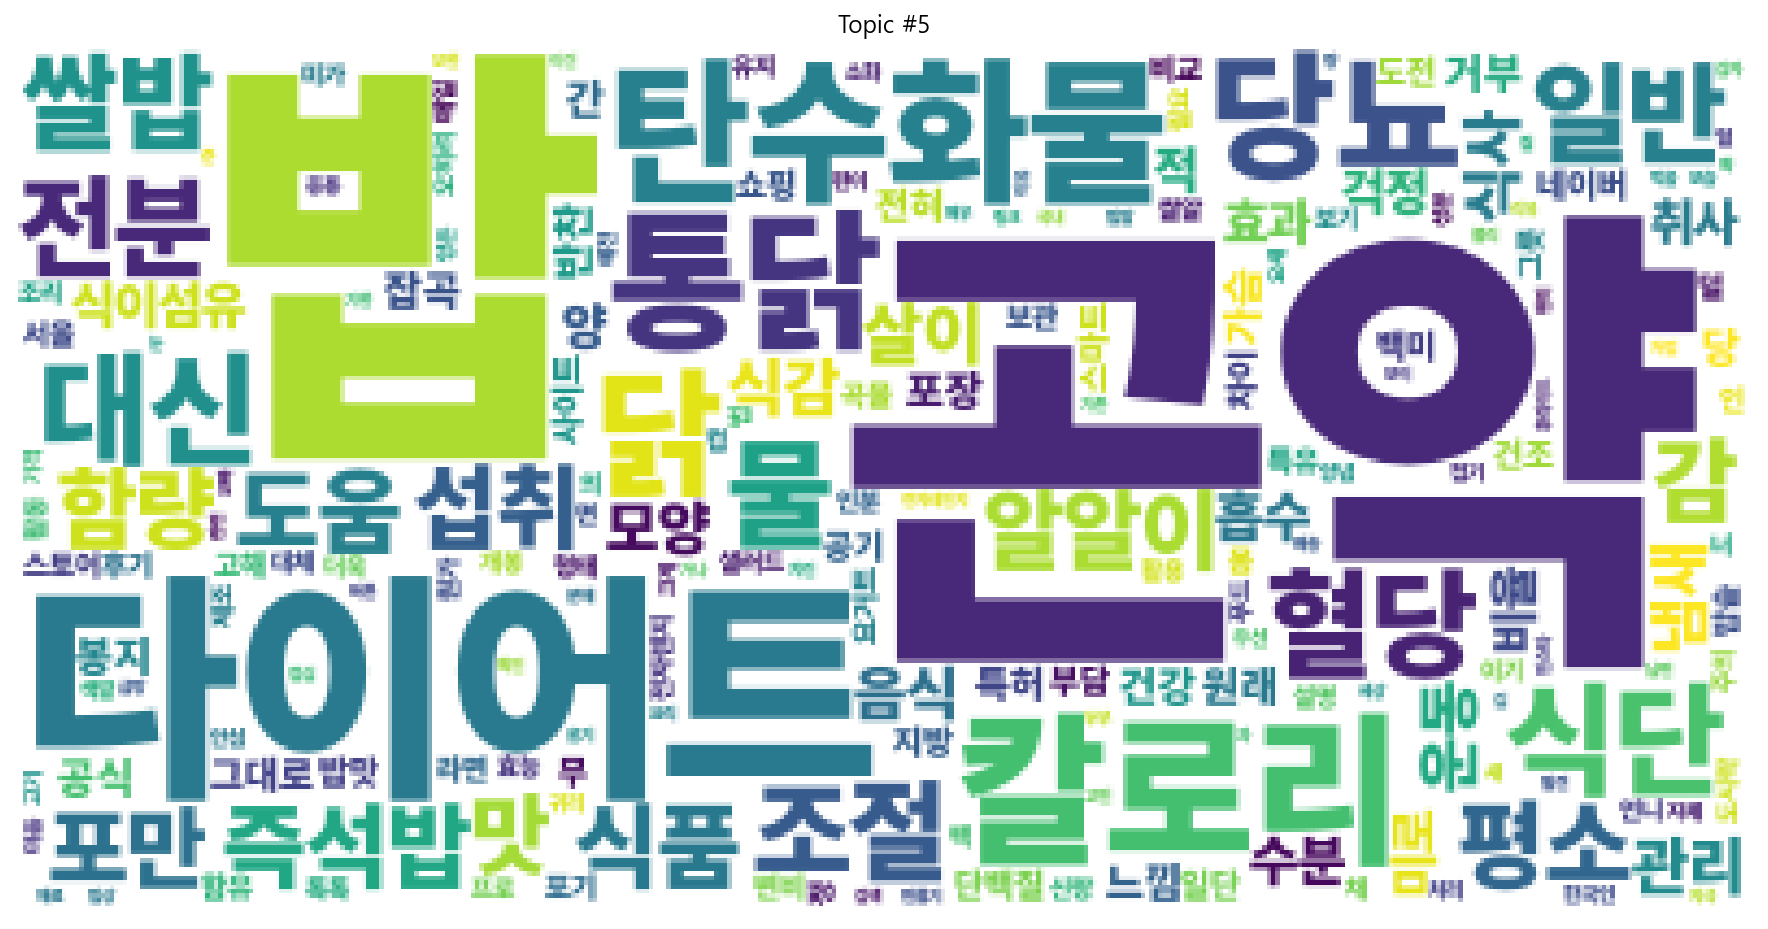

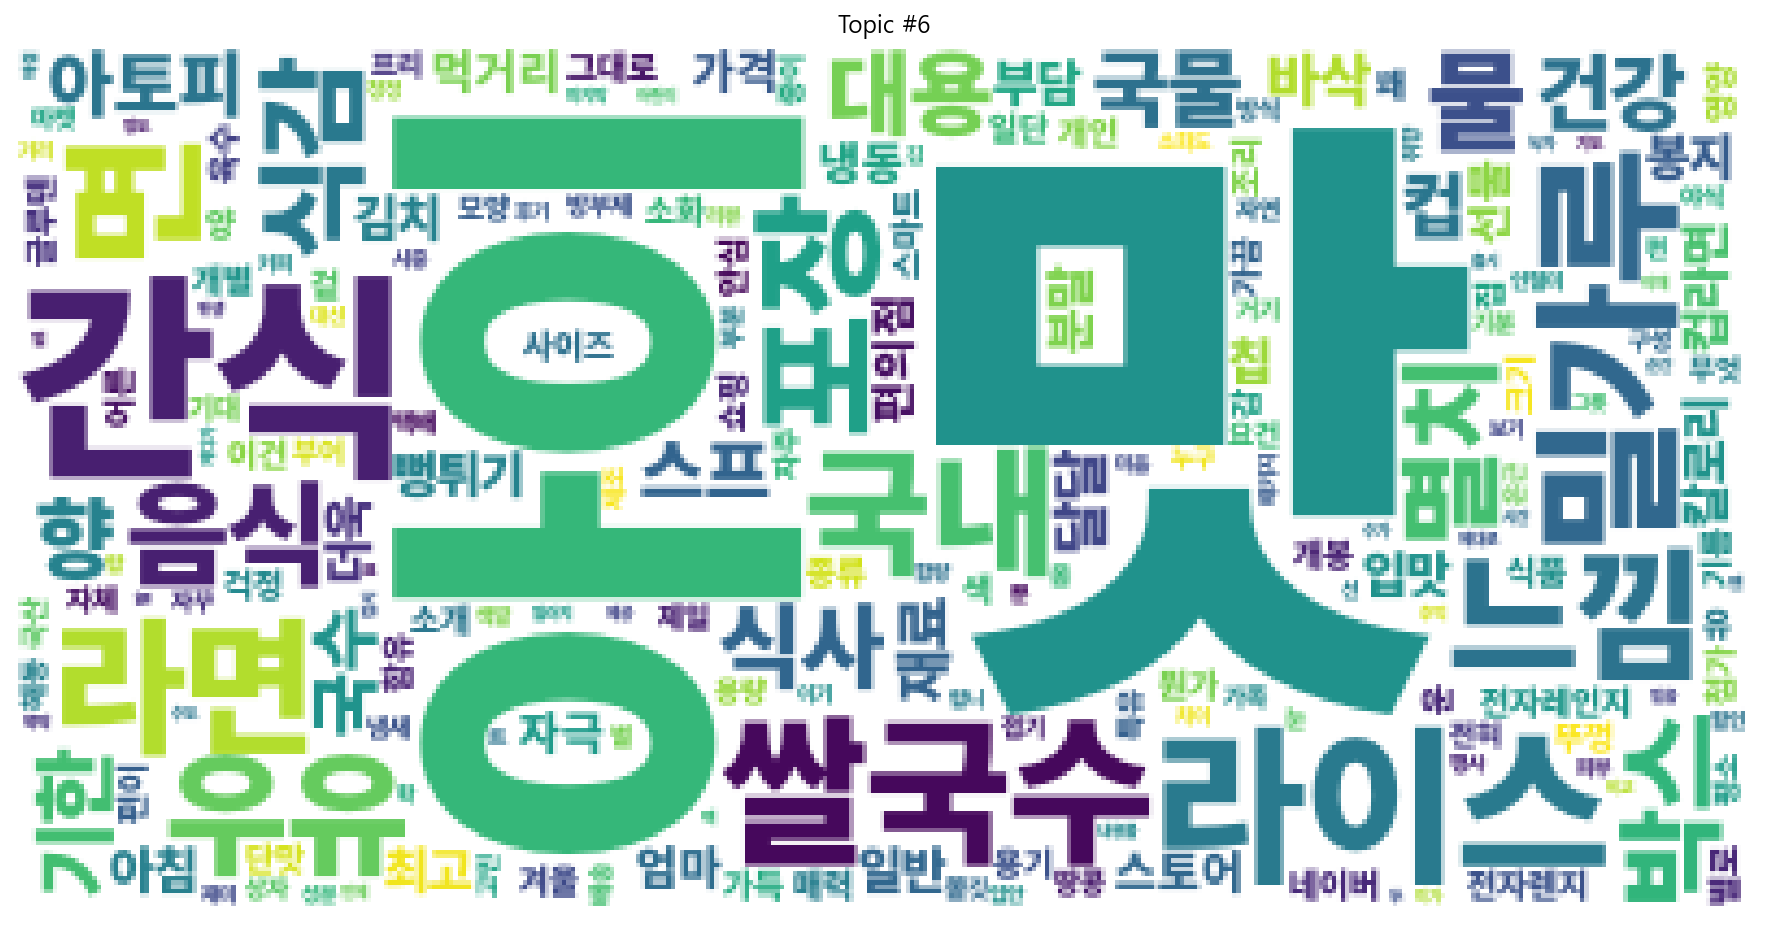

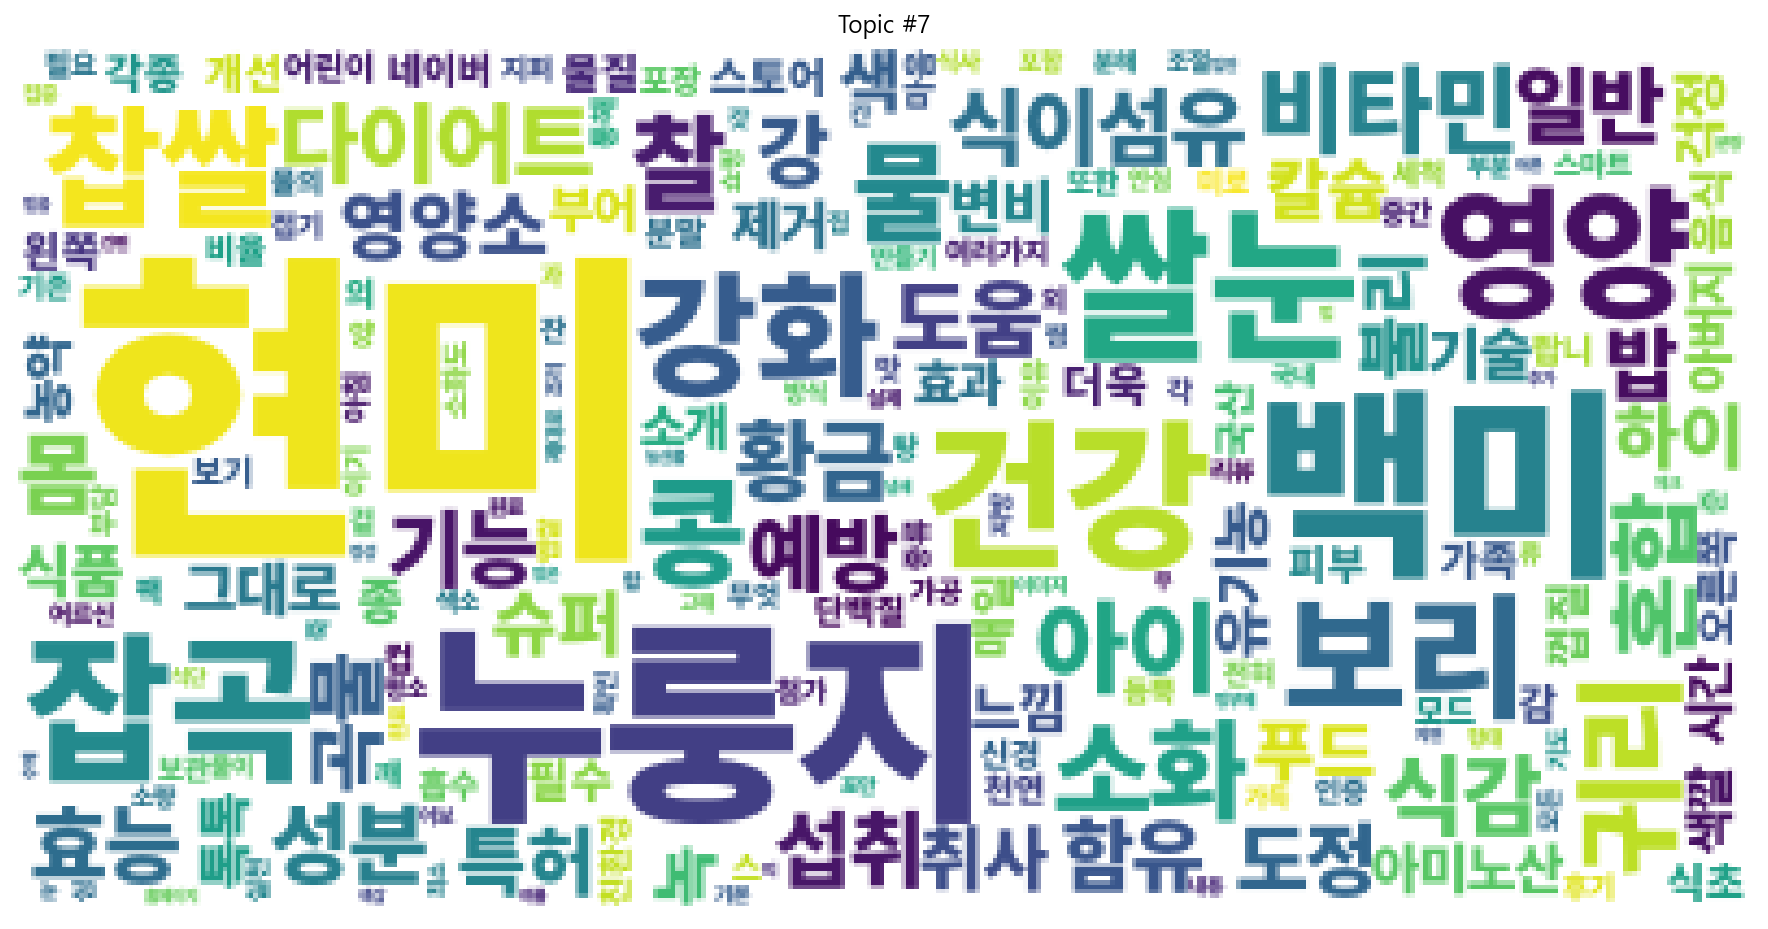

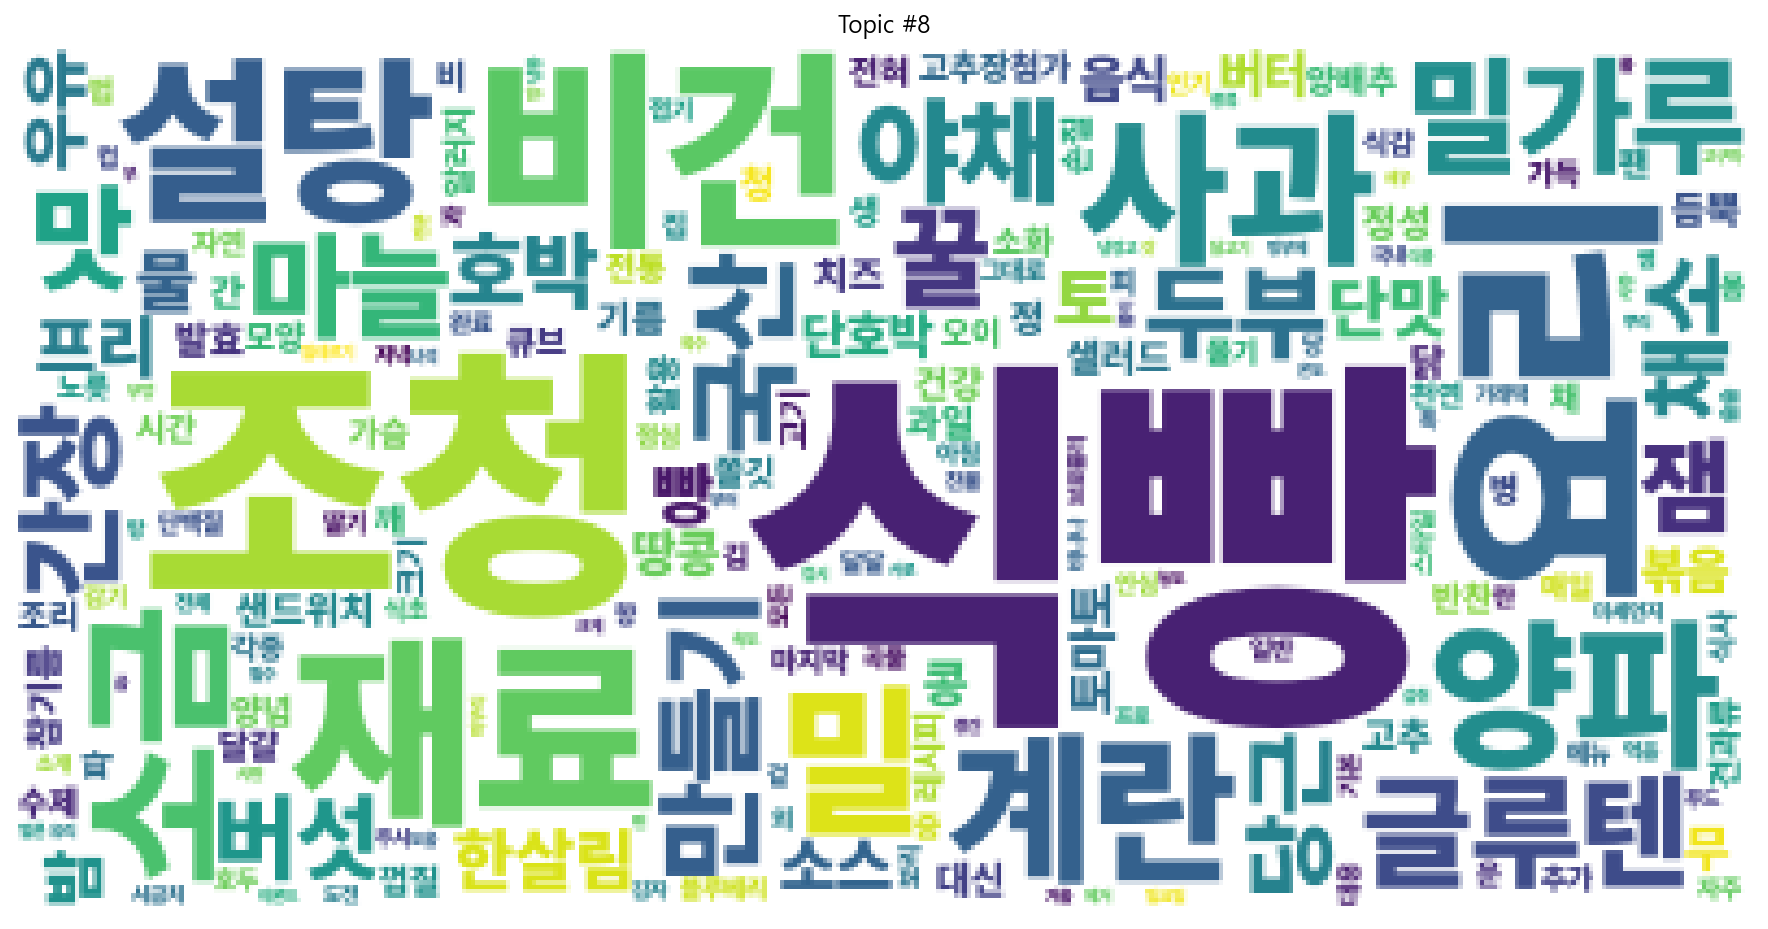

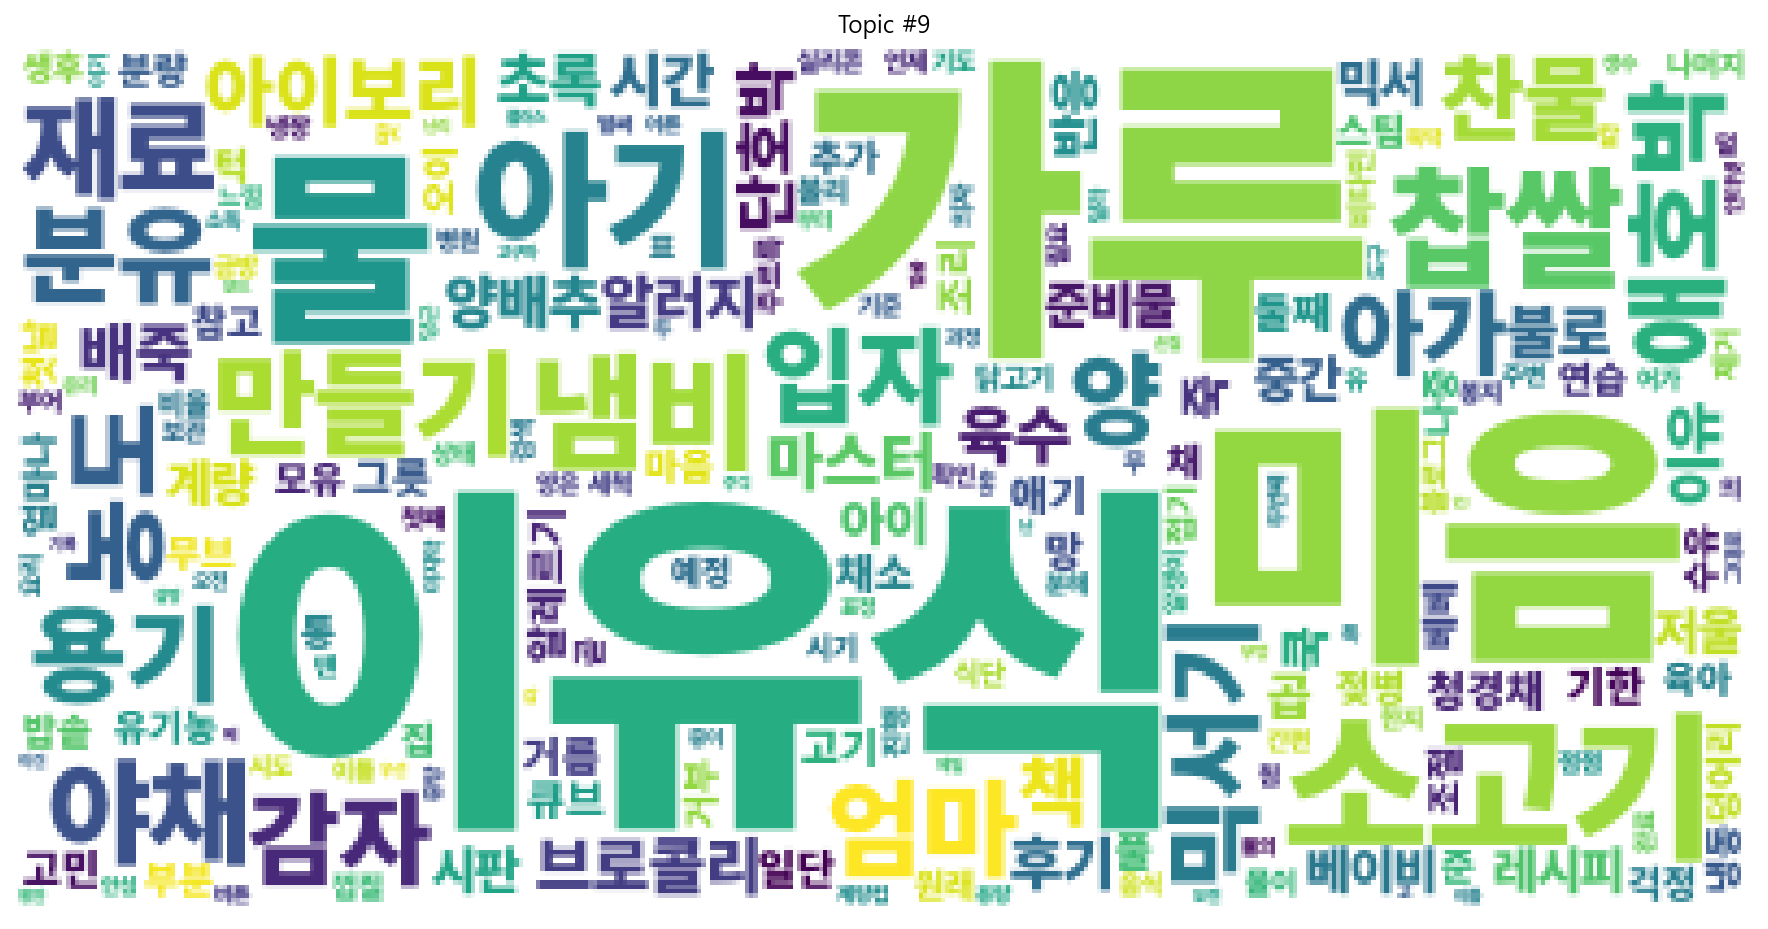

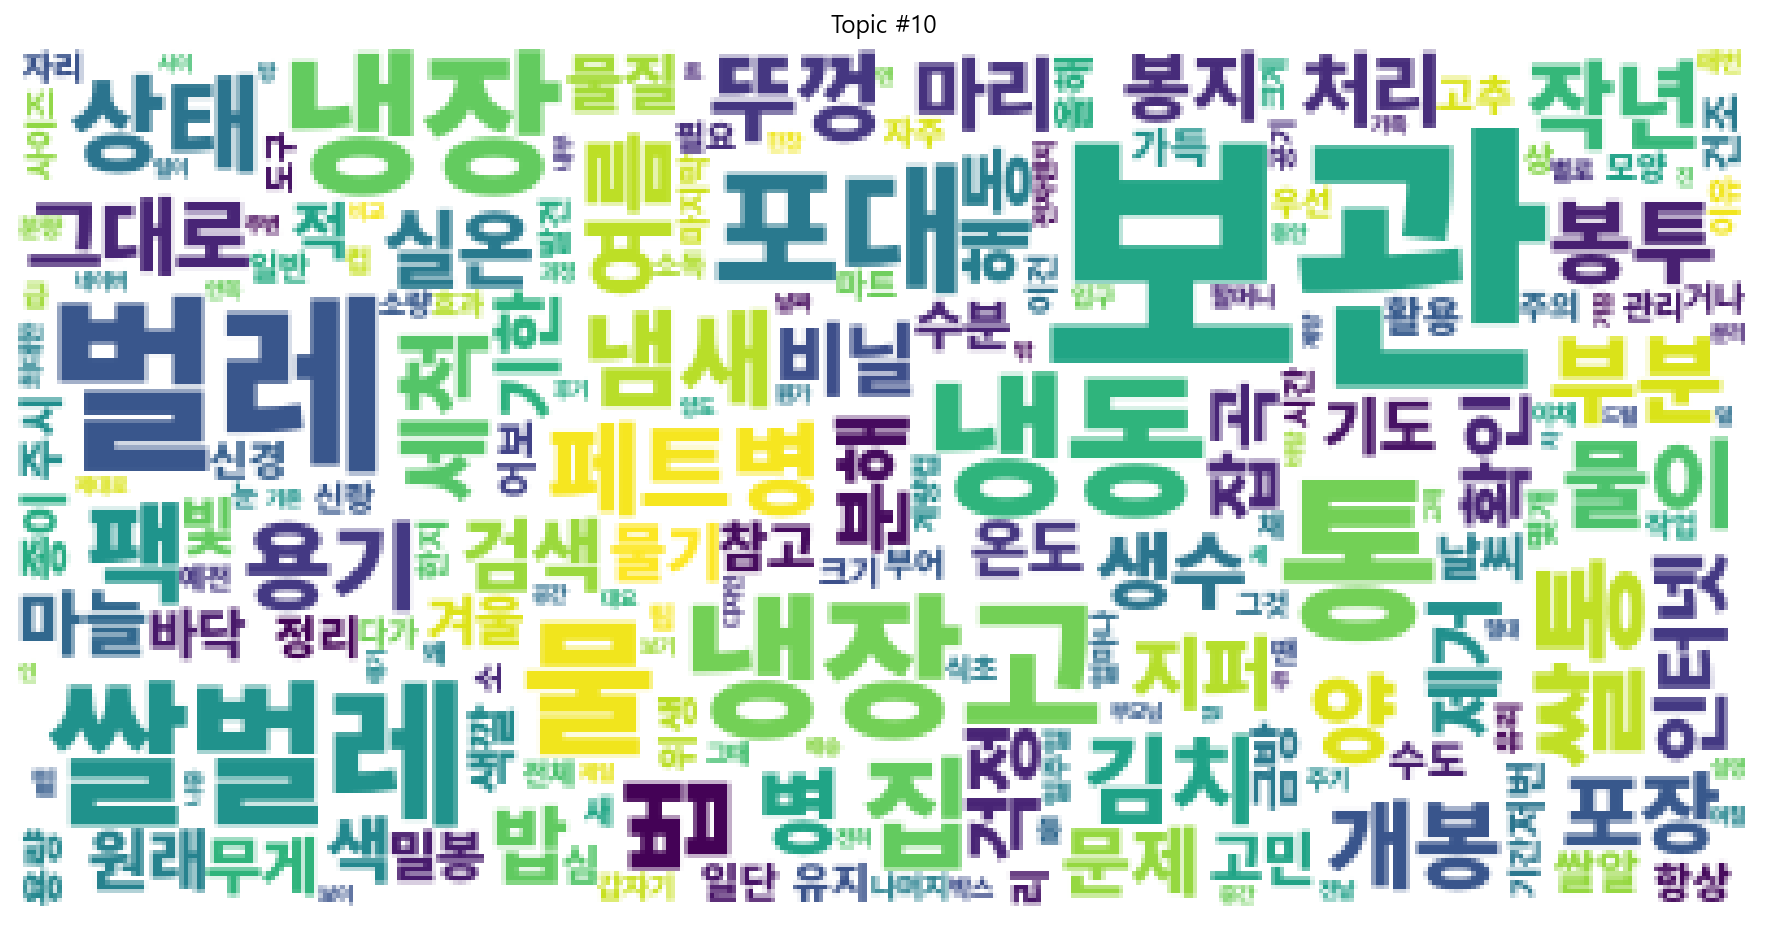

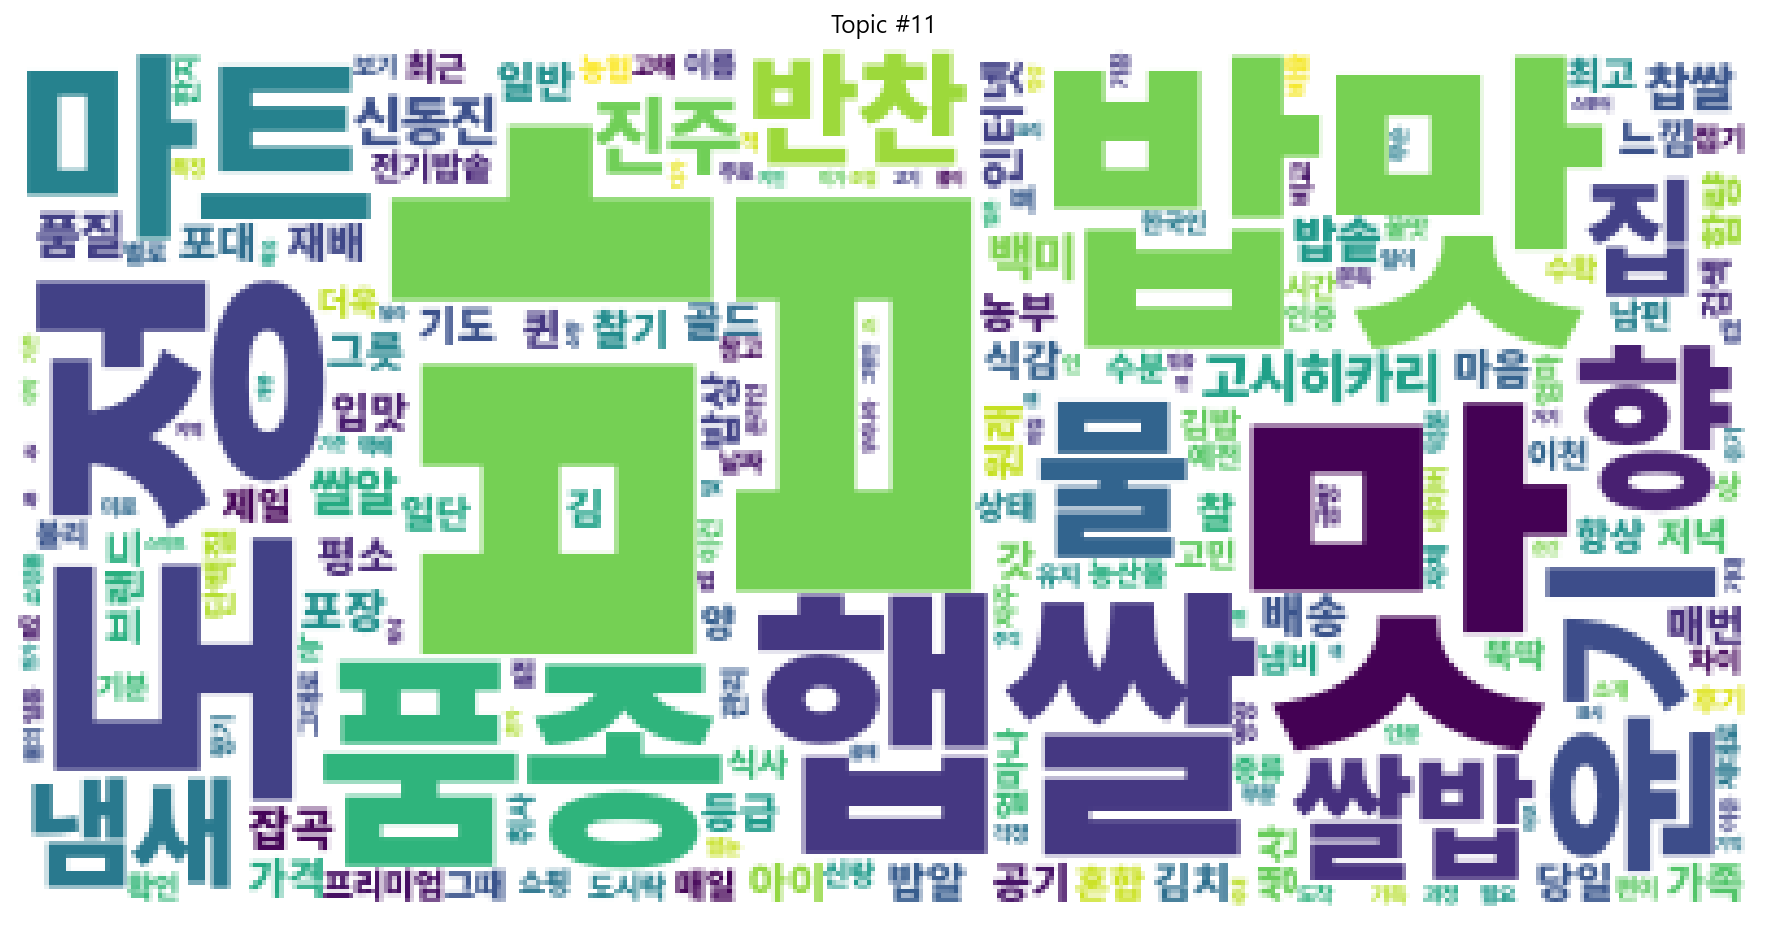

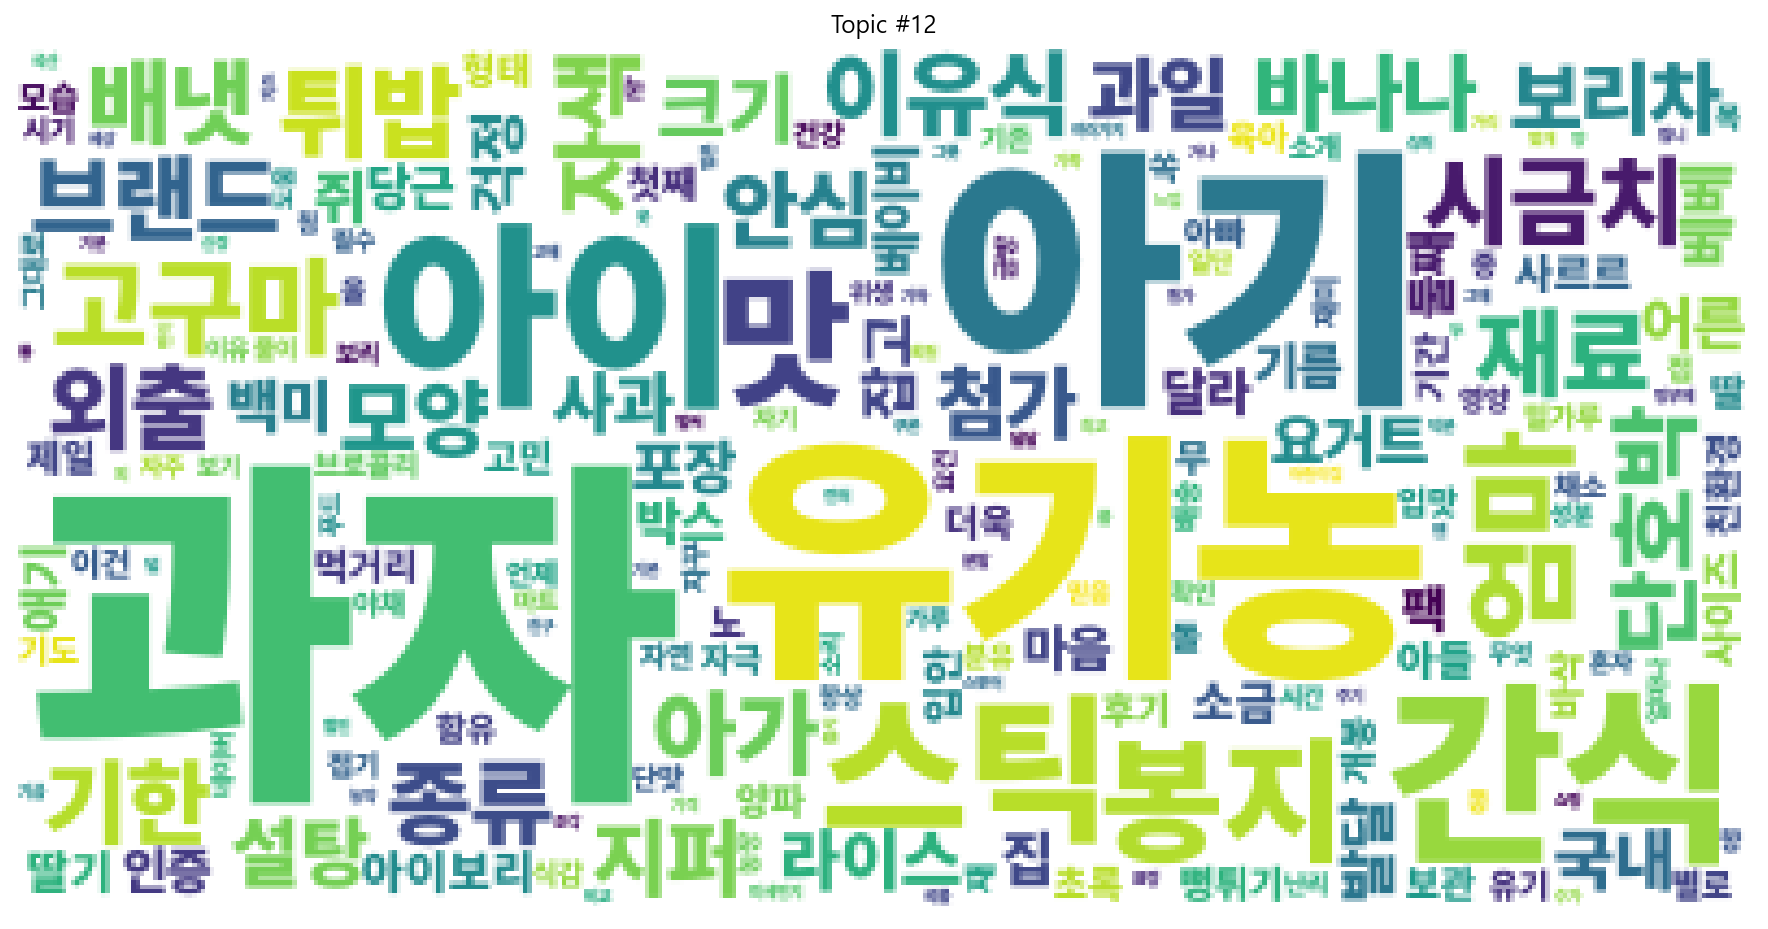

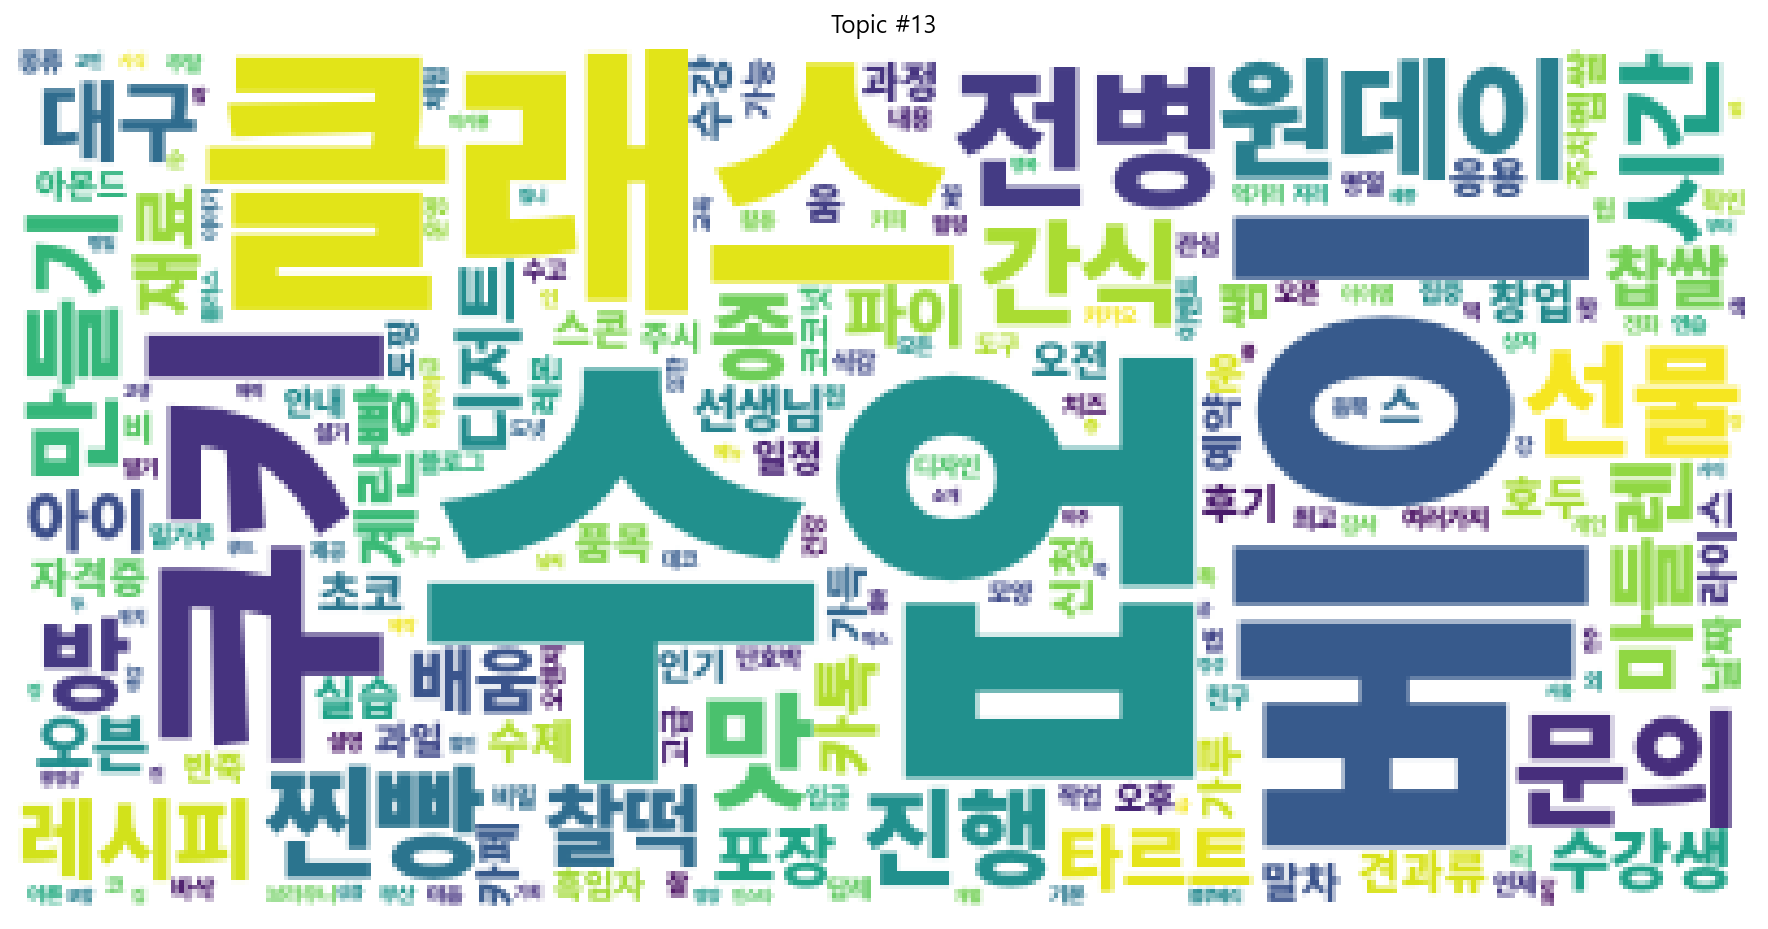

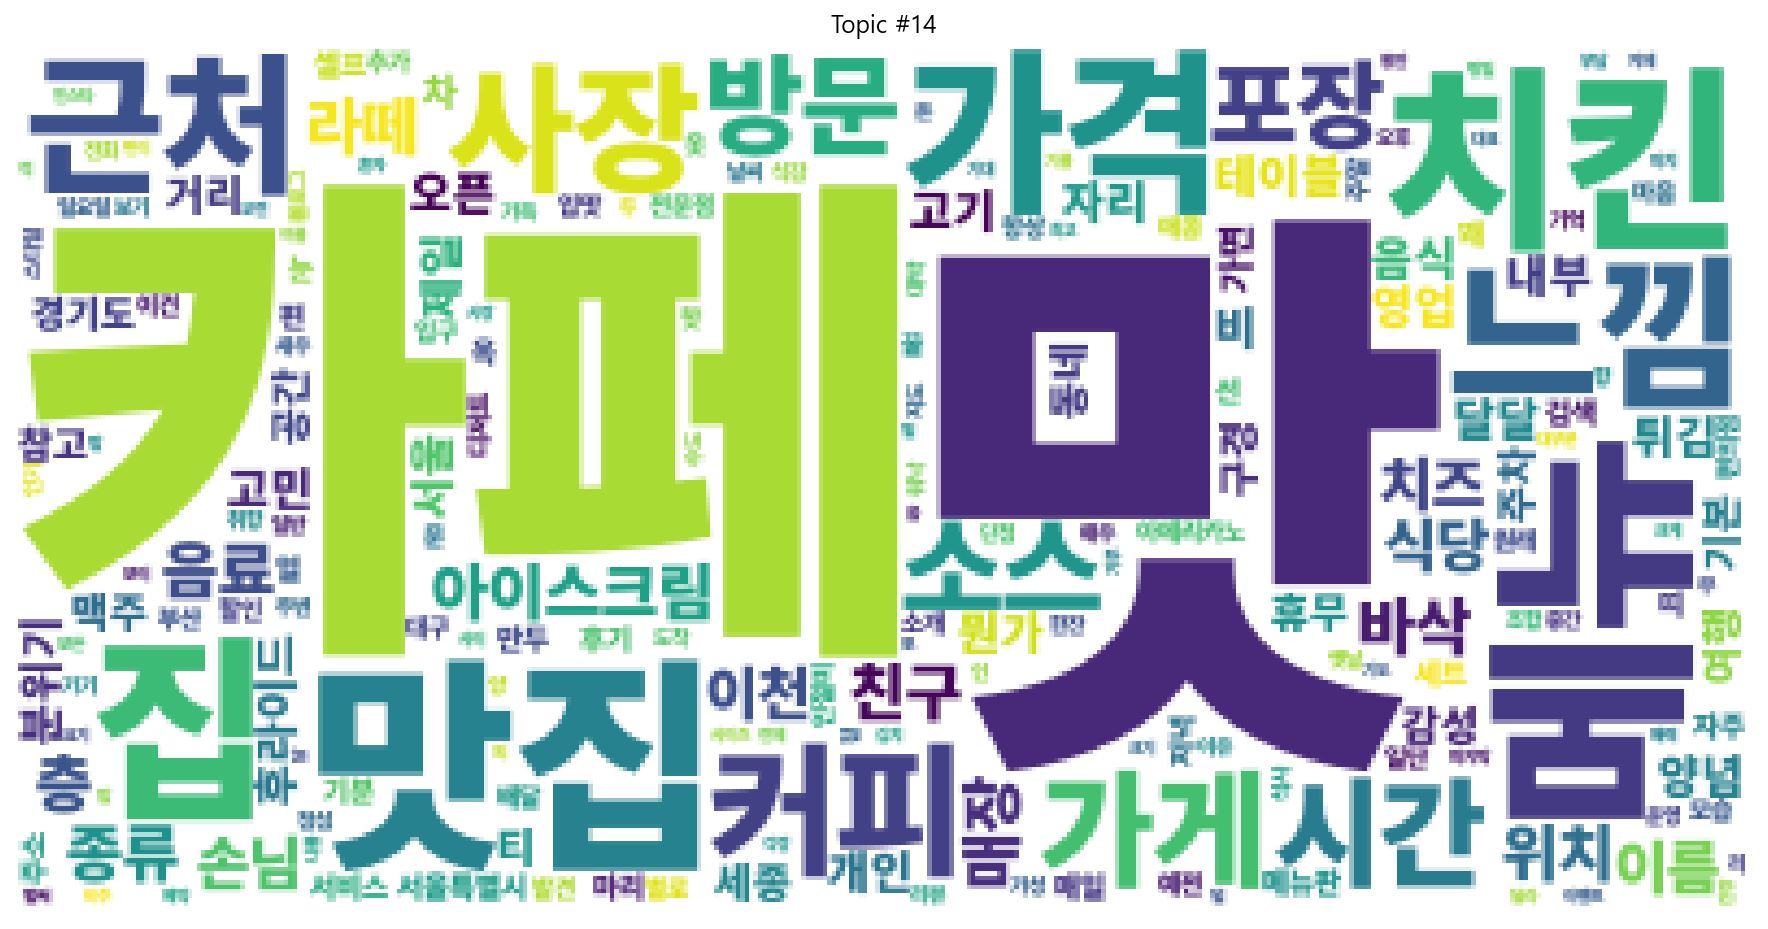

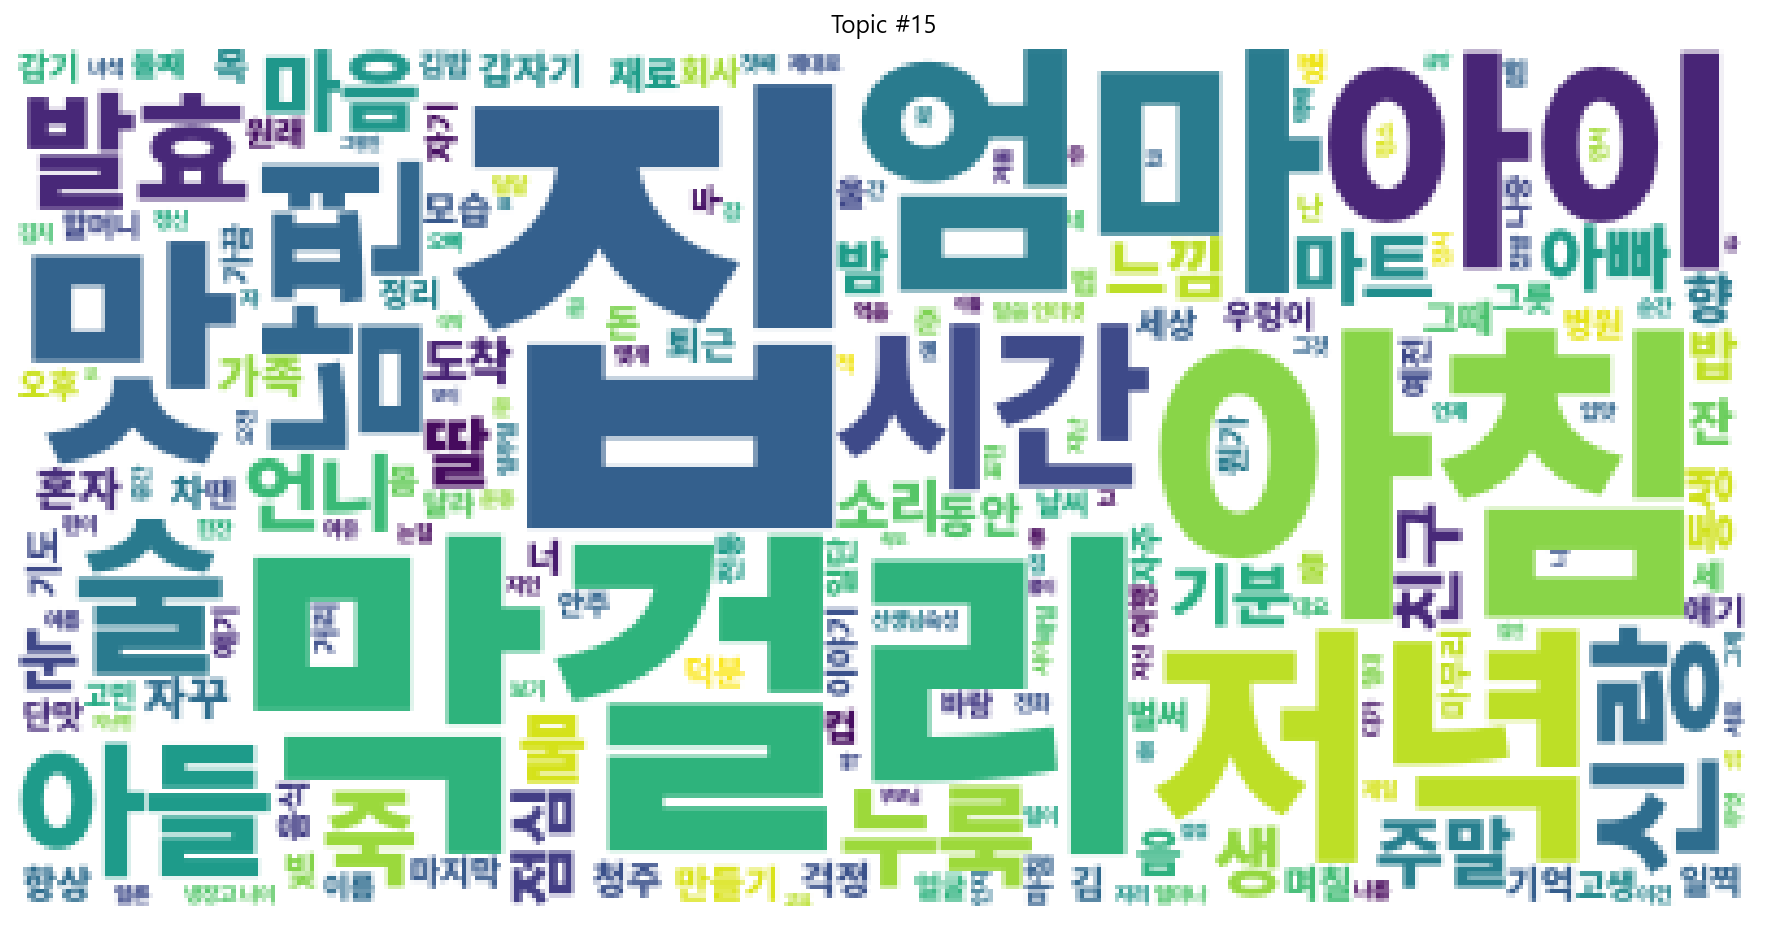

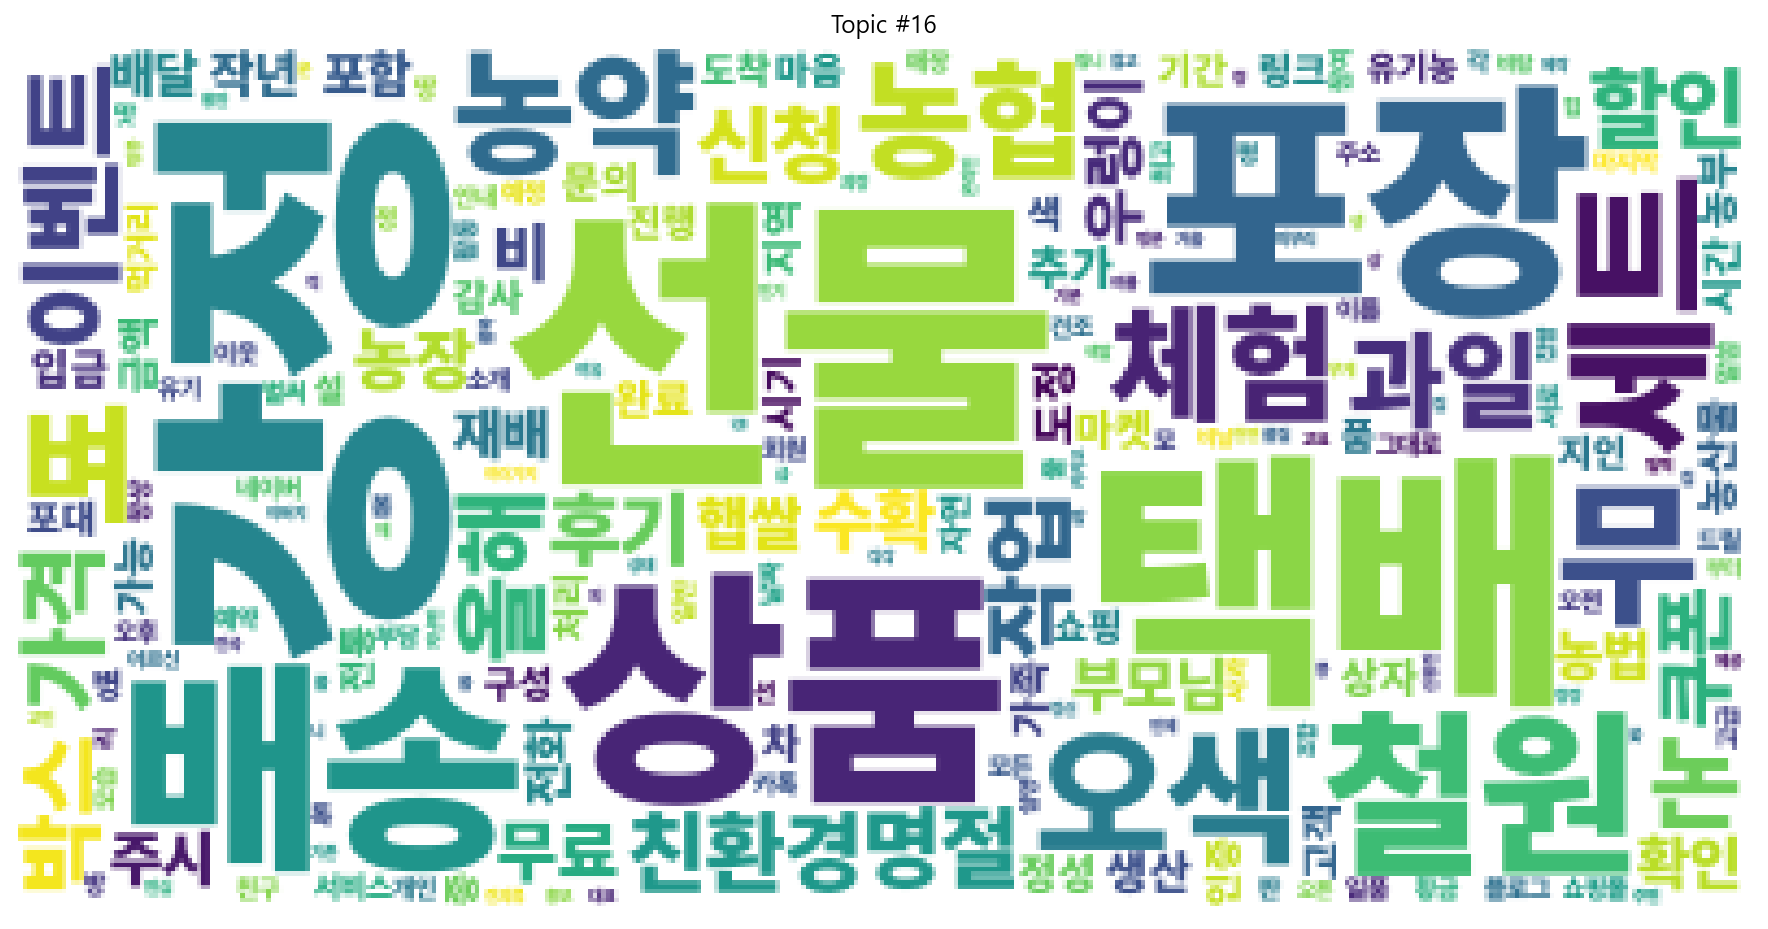

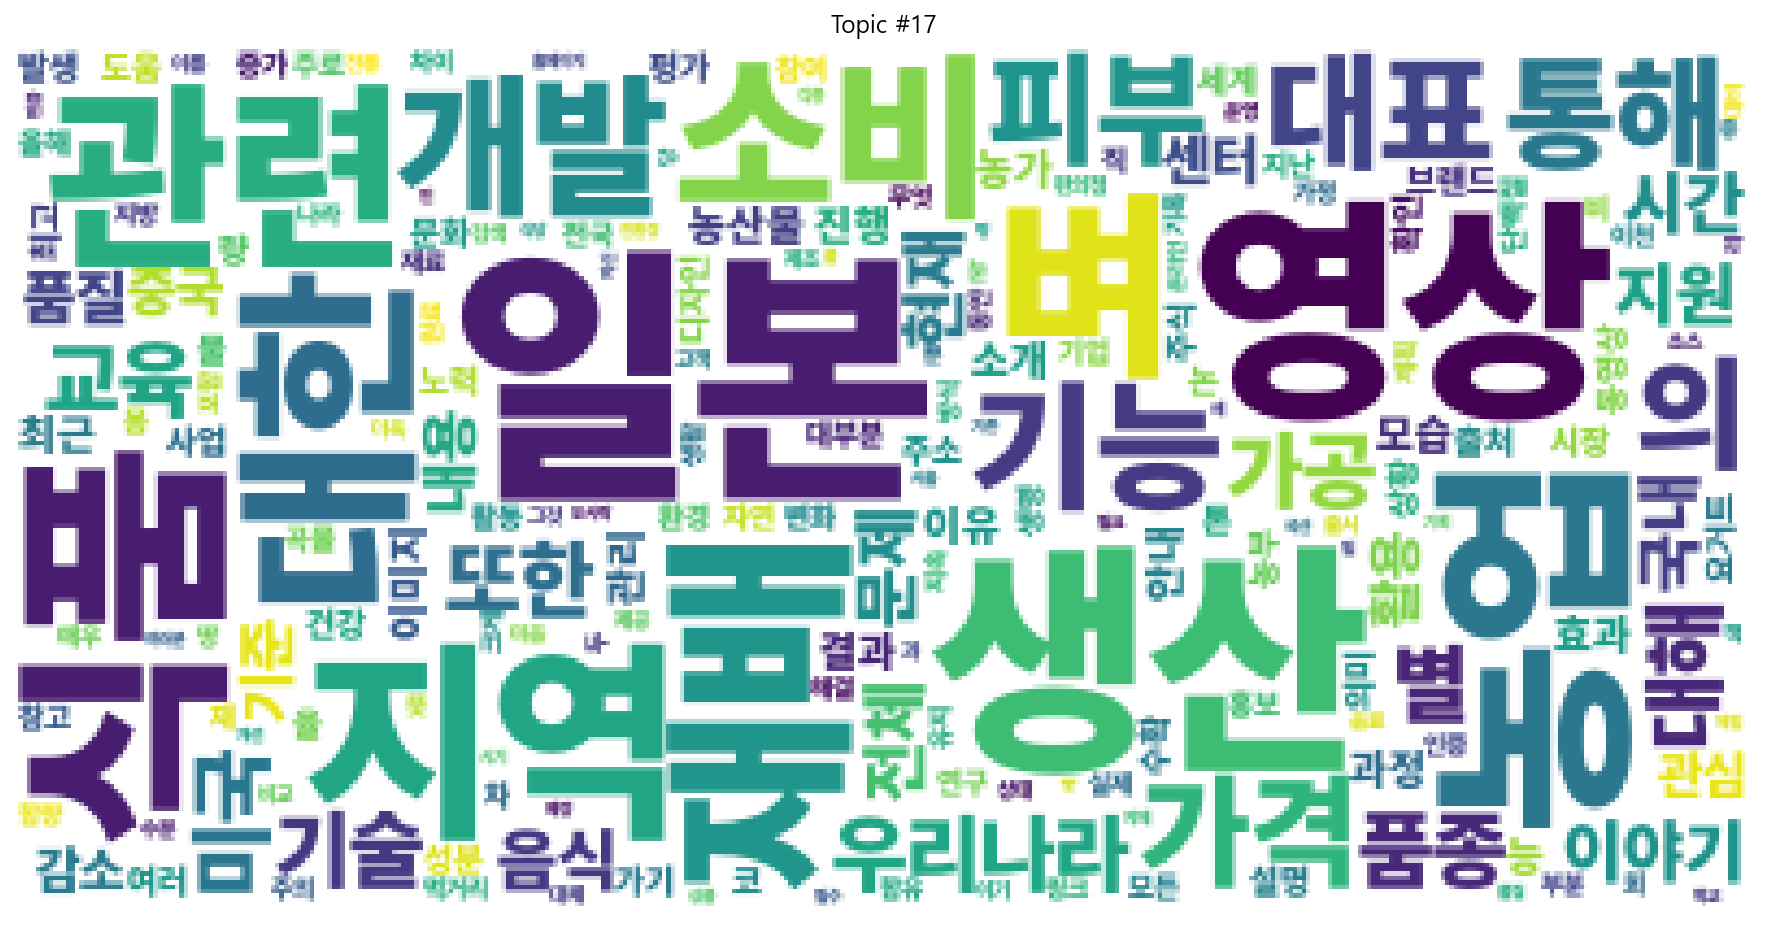

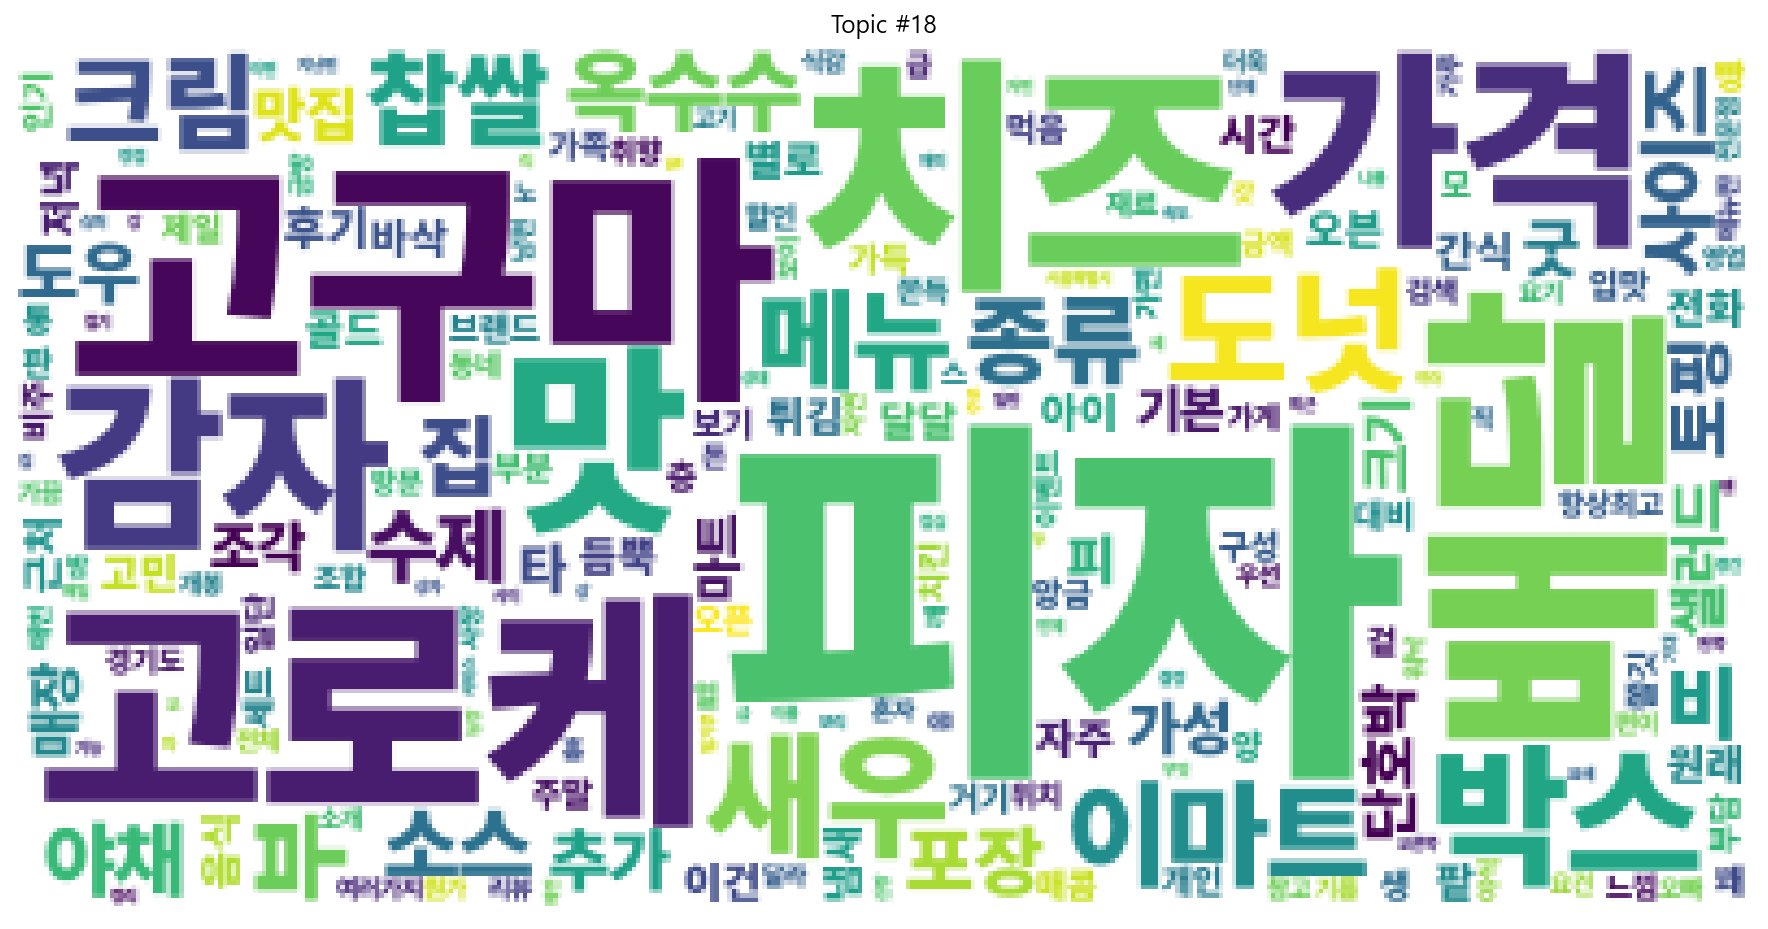

In [68]:
wc = WordCloud(background_color='white',font_path="Pretendard-Black.otf")            # ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú

plt.figure(figsize=(30,30))
for t in range(lda_model.num_topics):
    # plt.subplot(5,4,t+1)
    x = dict(lda_model.show_topic(t,200))
    im = wc.generate_from_frequencies(x)
    plt.figure(figsize=(16,8))
    plt.imshow(im)
    plt.axis("off")
    plt.title("Topic #" + str(t+1))

    plt.savefig('LDA_wordcloud_2019'+str(t+1)+'.png')

In [69]:
doc_per_topic_list = []

for n in range(len(corpus)):
    doc_topic = lda_model[corpus[n]]
    doc_topic = sorted(doc_topic, key=lambda x: (x[1]), reverse=True)
    topic_most_pr = doc_topic[0][0]
    topic_pr = doc_topic[0][1]
    doc_per_topic_list.append([n, topic_most_pr, topic_pr])
    
doc_topic_df = pd.DataFrame(doc_per_topic_list, columns=['Doc_Num', 'Topic', 'Percentage'])



doc_topic_df = doc_topic_df.join(result_df["text"])  

doc_topic_df

doc_topic_df.groupby('Topic')[['Doc_Num']].count()

Doc_Num
Topic         
0         1633
1          460
2          585
3          694
4          404
5          728
6          406
7          391
8         2651
9         1281
10        1707
11         999
12        1130
13        1162
14        1236
15         871
16         875
17         476

In [70]:
doc_topic_df

Doc_Num  Topic  Percentage  \
0            0      8    0.737532   
1            1      0    0.707281   
2            2      7    0.442087   
3            3      6    0.256150   
4            4      4    0.510224   
...        ...    ...         ...   
17684    17684     11    0.527777   
17685    17685      8    0.811109   
17686    17686     16    0.404889   
17687    17687     11    0.563714   
17688    17688     11    0.498400   

                                                    text  
0      :: Pocohol Recipe ::\nÏö∞Î¶¨ ÏïÑÏù¥Î•º ÏúÑÌïú Ï≤´ ÏöîÎ¶¨, ÏåÄÎØ∏Ïùå ÎßåÎì§Í∏∞\...  
1      #ÏåÄÏºÄÏù¥ÌÅ¨ÎßåÎì§Í∏∞\n\n\n\nÏåÄÏºÄÏù¥ÌÅ¨ÎßåÎì§Í∏∞Ïùò Í∏∞Î≥∏ÏùÄ\n#Ï†úÎàÑÏôÄÏ¶àÎßåÎì§Í∏∞ !!\n\n#...  
2      ÏùºÎ≥∏Ïãù ÏÜåÍ≥†Í∏∞Ïπ¥Î†à ÎßåÎìúÎäîÎ≤ï ‚ì¶. Ï†ÑÎÇ®ÏåÄ 10kg\nÏñ¥Î¶¥ÎïåÎäî ÏßÄÍ∏àÎèÑ ÎïåÎïåÎ°ú „Öã \nÎÖ∏...  
3      Í±¥Í∞ïÏöîÎ¶¨ Í∞ïÏ¢åÏóêÏÑú  ÏåÄÎàÑÎ£©ÏúºÎ°ú Îã§ÏñëÌïú ÏöîÎ¶¨Î•º ÎßåÎì§ Ïàò ÏûàÎäî  Í≤ÉÏùÑ ÏïåÍ≥†\nÌò∏Í∏∞Ïã¨Í≥º ...  
4      Í≥§ÏïΩÎ∞•\nÎßåÎìúÎäî Î≤ï\n#Í≥§ÏïΩÎ∞•\nÍ∏Ä, ÏÇ¨ÏßÑ / Ïπ¥Î†åC\nÏöîÏ¶ò ÏßëÏóêÏÑú ÏãùÏÇ¨Ìï† Îïå Î®πÍ≥†...  
...                                                  ...  
17684                     ÏåÄÍ≥ºÏûê ÎÉ†ÎÉ† ÎßõÏûàÍ≤å Î®πÏúºÎ©∞ Ïó¥Ïã¨Ìûà Ï¶êÍ≤ÅÍ≤å Í≥µÎ∂ÄÌï¥Î¥êÏöî~üíï  
17685           Ï†ÄÏö∏ÏùÄ Ï§ÄÎπÑÎ•º ÏïàÌñàÏñ¥ÏöîÎ∂ÑÏú†Ïä§ÌëºÏúºÎ°ú ÏåÄÍ∞ÄÎ£® Î™áÍ∑∏Îû® ÎÇòÏò¨ÍπåÏöî?Ï¥àÍ∏∞Ïù¥Ïú†ÏãùÏûÖÎãàÎã§  
17686  ¬† *Ïò§ÎäòÏùò ÏµúÏ†ÄÍ∞Ä Ï†ïÎ≥¥Î°ØÎç∞ Î∞±ÌôîÏ†ê ÎÇ©Ìíà 10kg ÏåÄÎì±Í∏â ÏÉÅÎëêÍ∞ú Íµ¨Îß§ Í∞úÎãπ 23.7...  
17687  ÏåÄÌäÄÎ∞• ÎëêÍ∞ú (Ïú†ÌÜµÍ∏∞Ìïú 2020.3.17)Ïñ¥Í∑∏ 130ÏÇ¨Ïù¥Ï¶à(ÏÇ¨Ïö©Í∞ê ÏûáÎÑ§Ïö©)Í≤ÄÏ†ï Ïö¥Îèô...  
17688  ÎßòÎßàÎ∞Ä ÏïàÏã¨Ïù¥Ïú†Ïãù Îã®Ìò∏Î∞ïÍ≥º ÏÜåÍ≥†Í∏∞ 5Í∞úÏÇ¨Í≥ºÏôÄ Í≥†Íµ¨Îßà Ìì®Î†à 4Í∞ú (20ÎÖÑ 5ÏõîÍπåÏßÄ)Ïöî...  

[17689 rows x 4 columns]

In [71]:
doc_topic_df.to_excel("2019topic_18.xlsx")